In [160]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.style.use('seaborn') 
plt.rcParams['figure.dpi'] = 300
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


## Plot saturation and Npd

In [161]:
xds = np.load('mc_xds.npy')
means_sw = np.load('mc_means_sw.npy')
sws_upp = np.load('mc_sws_upp.npy')
sws_low = np.load('mc_sws_low.npy')
times = np.load('mc_times.npy')
means_npd = np.load('mc_means_npd.npy')
npds_upp = np.load('mc_npds_upp.npy')
npds_low = np.load('mc_npds_low.npy')
npds_squared_integral = np.load('mc_npds_squared_integral.npy')
output_times = np.load('mc_output_times.npy')

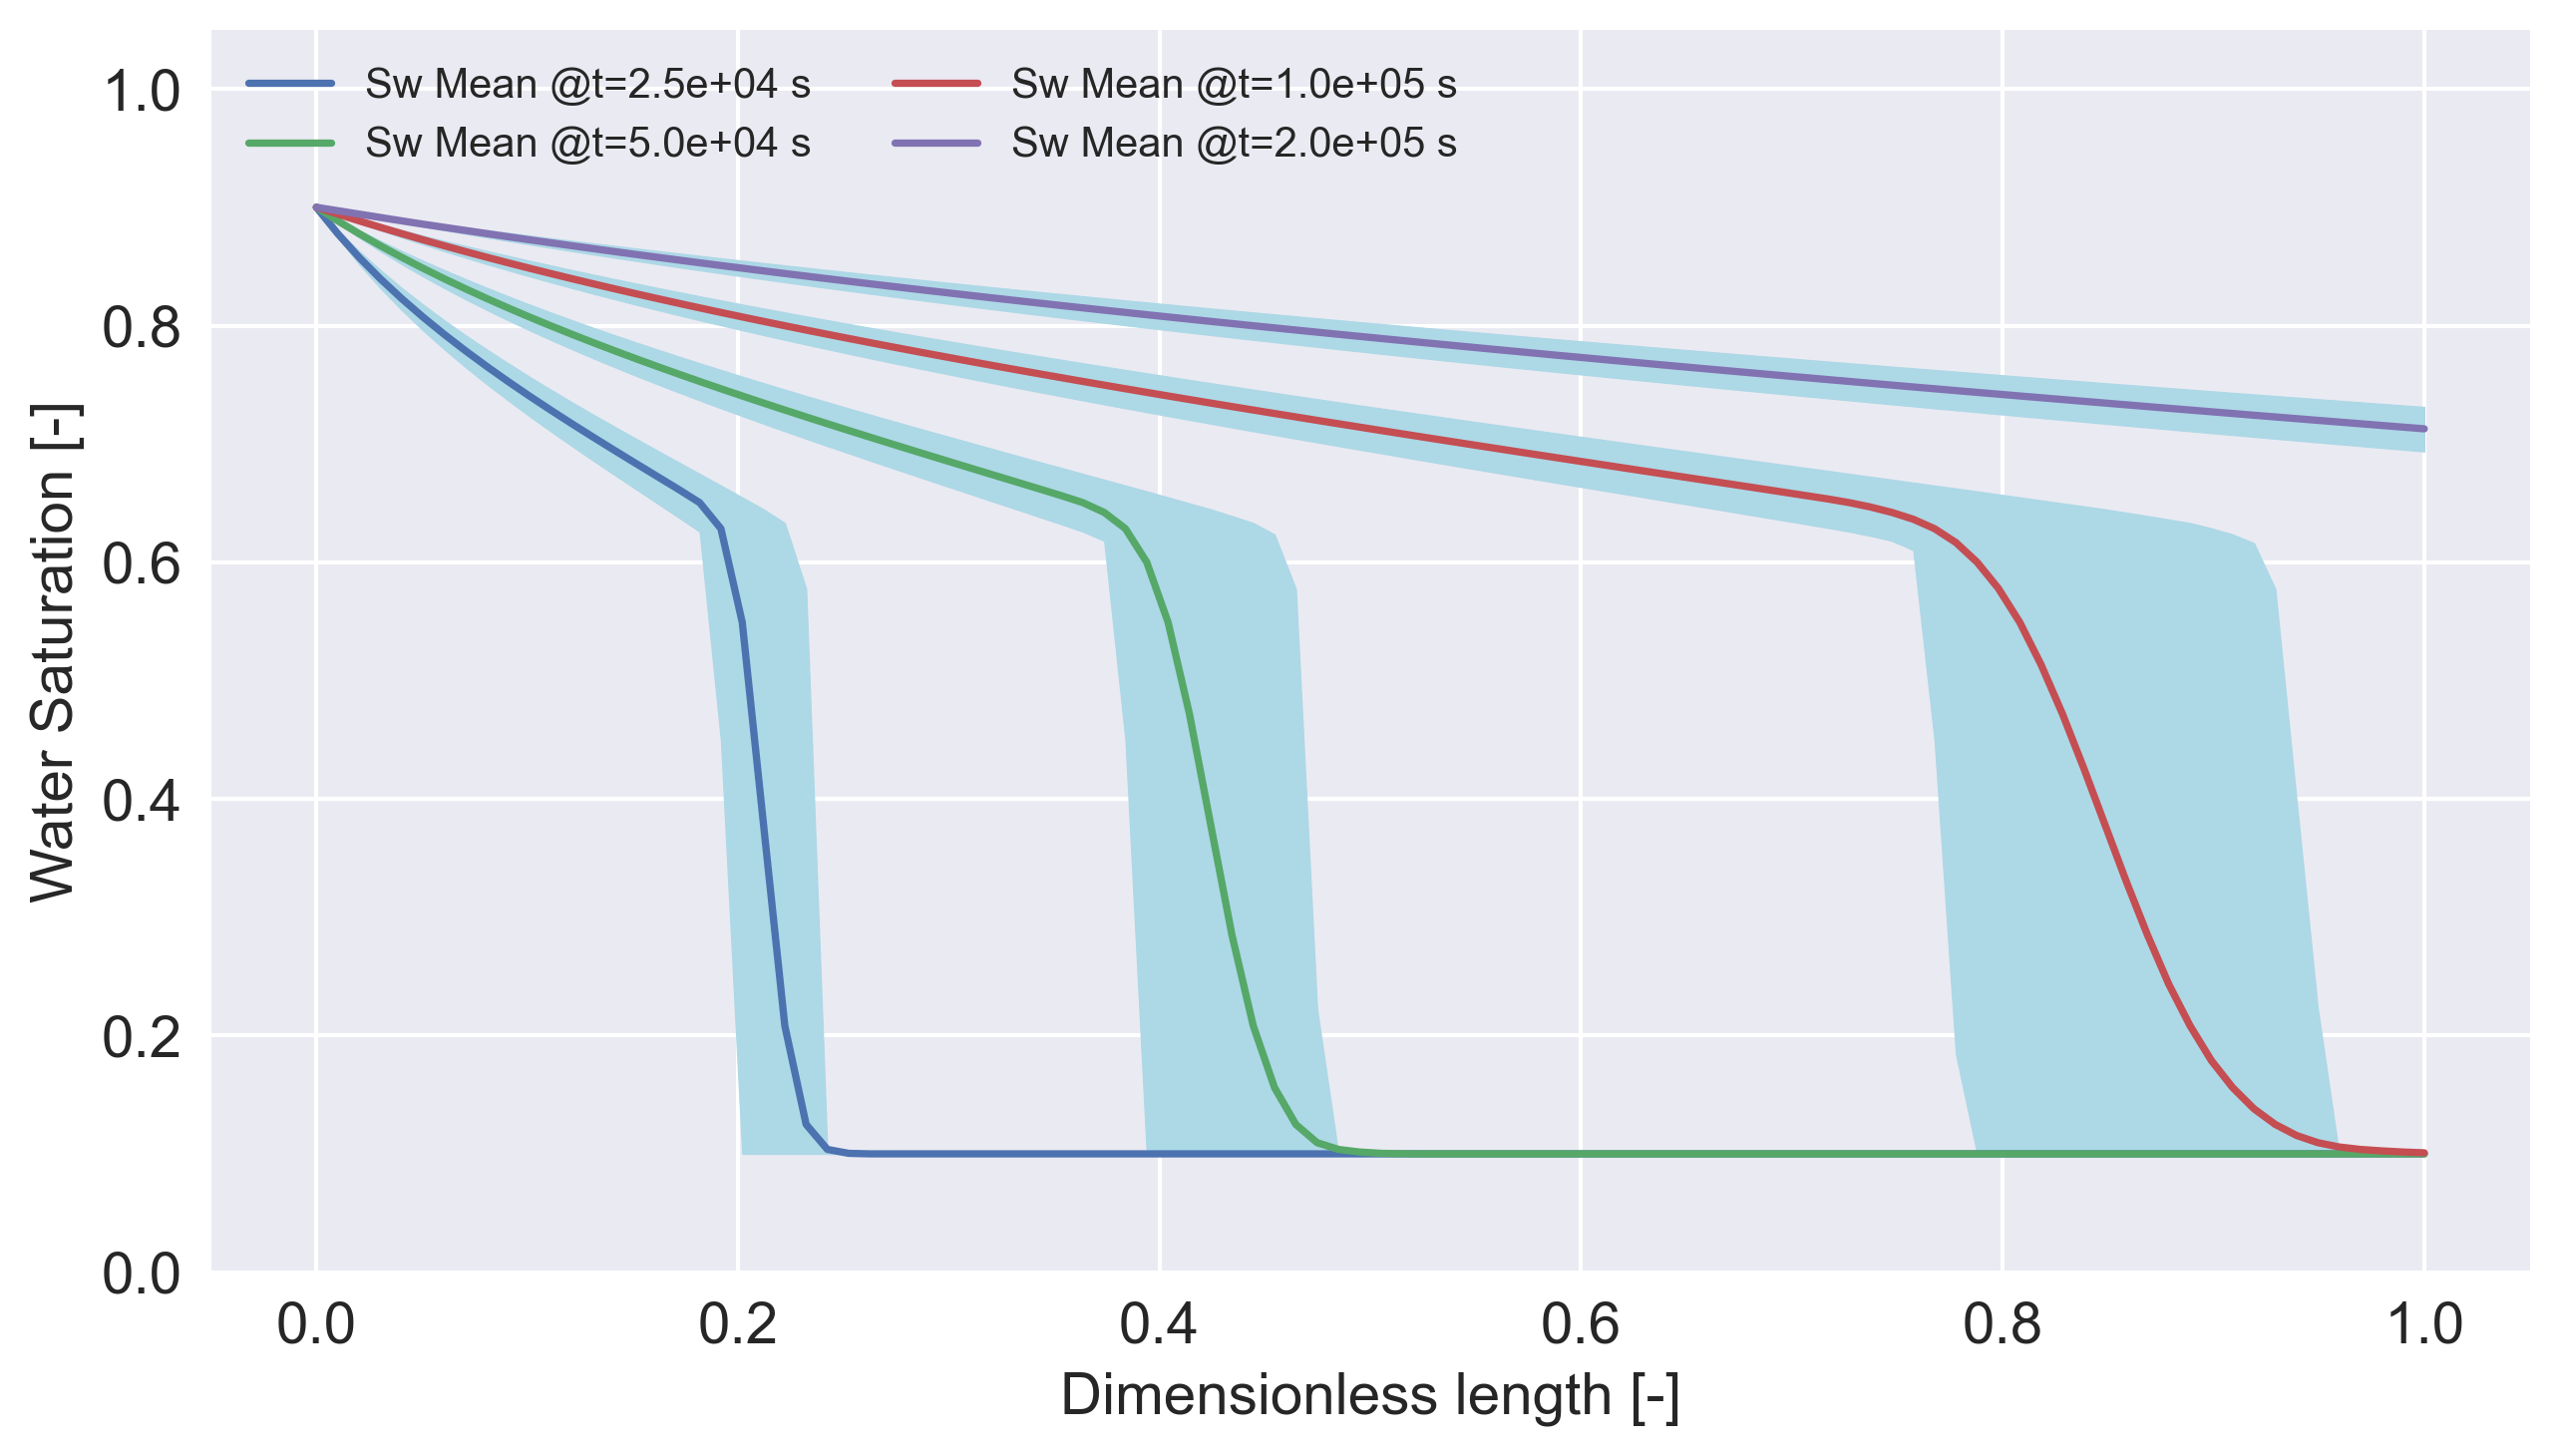

No handles with labels found to put in legend.


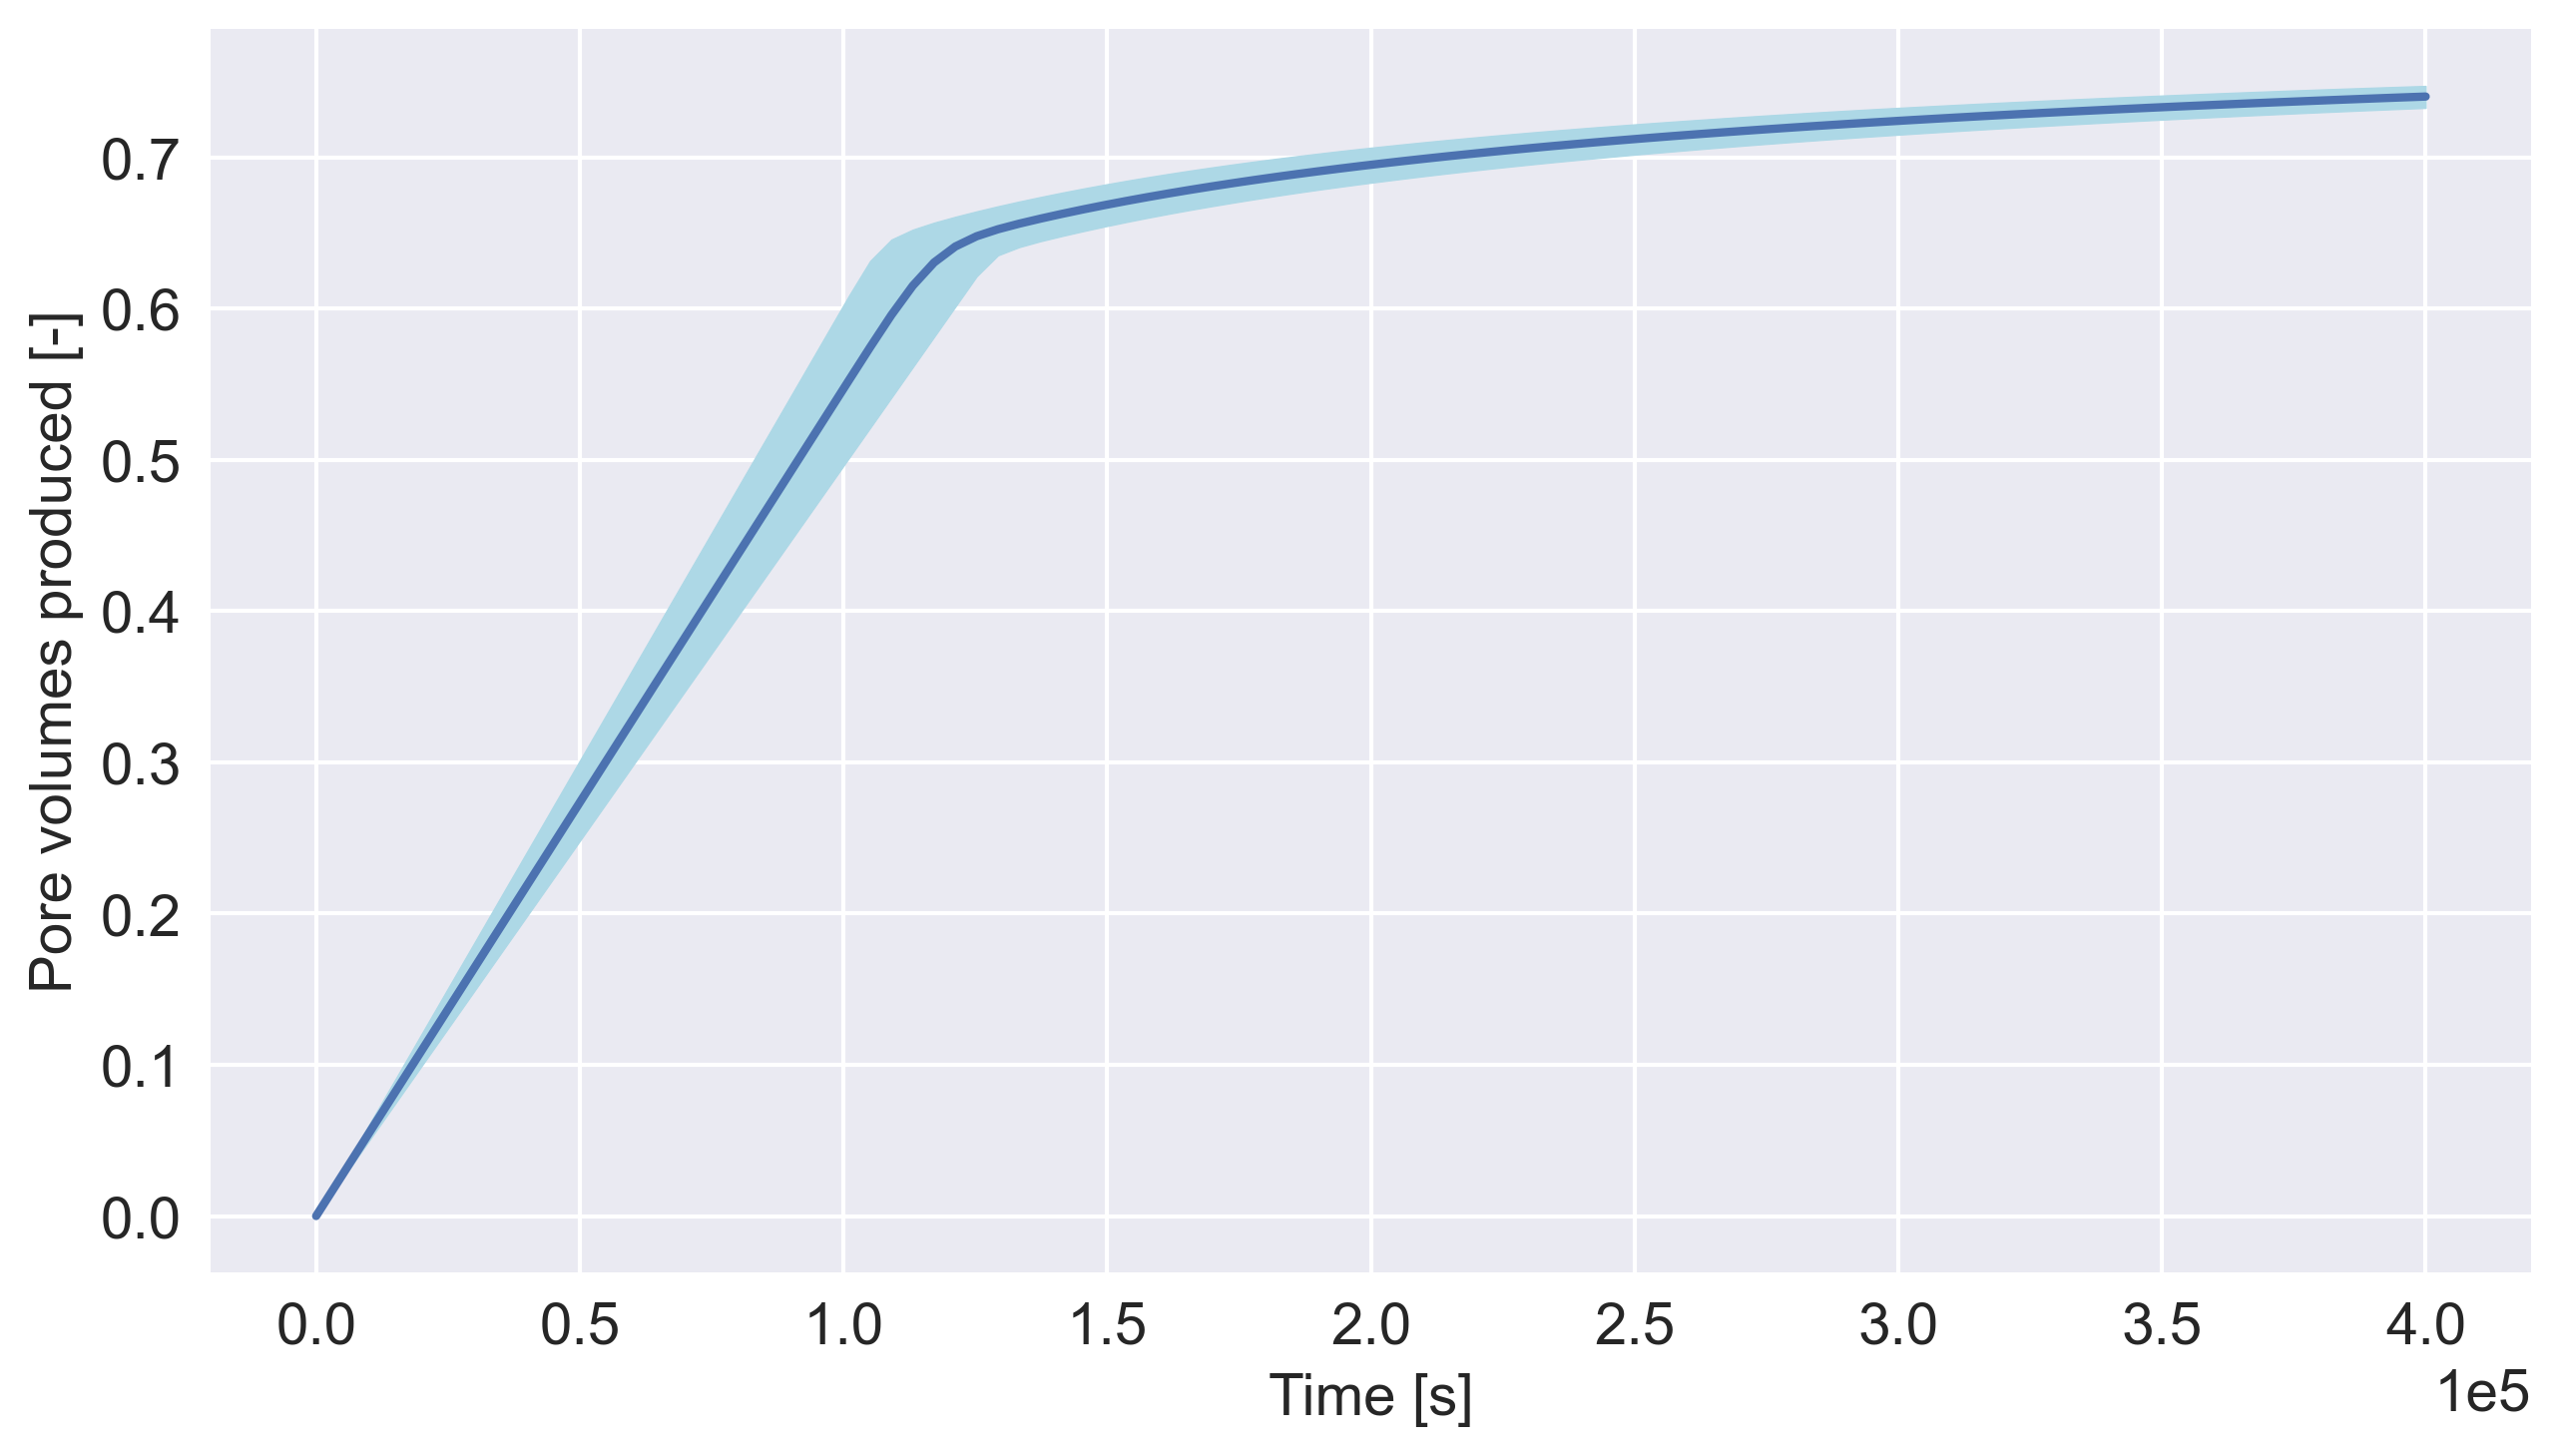

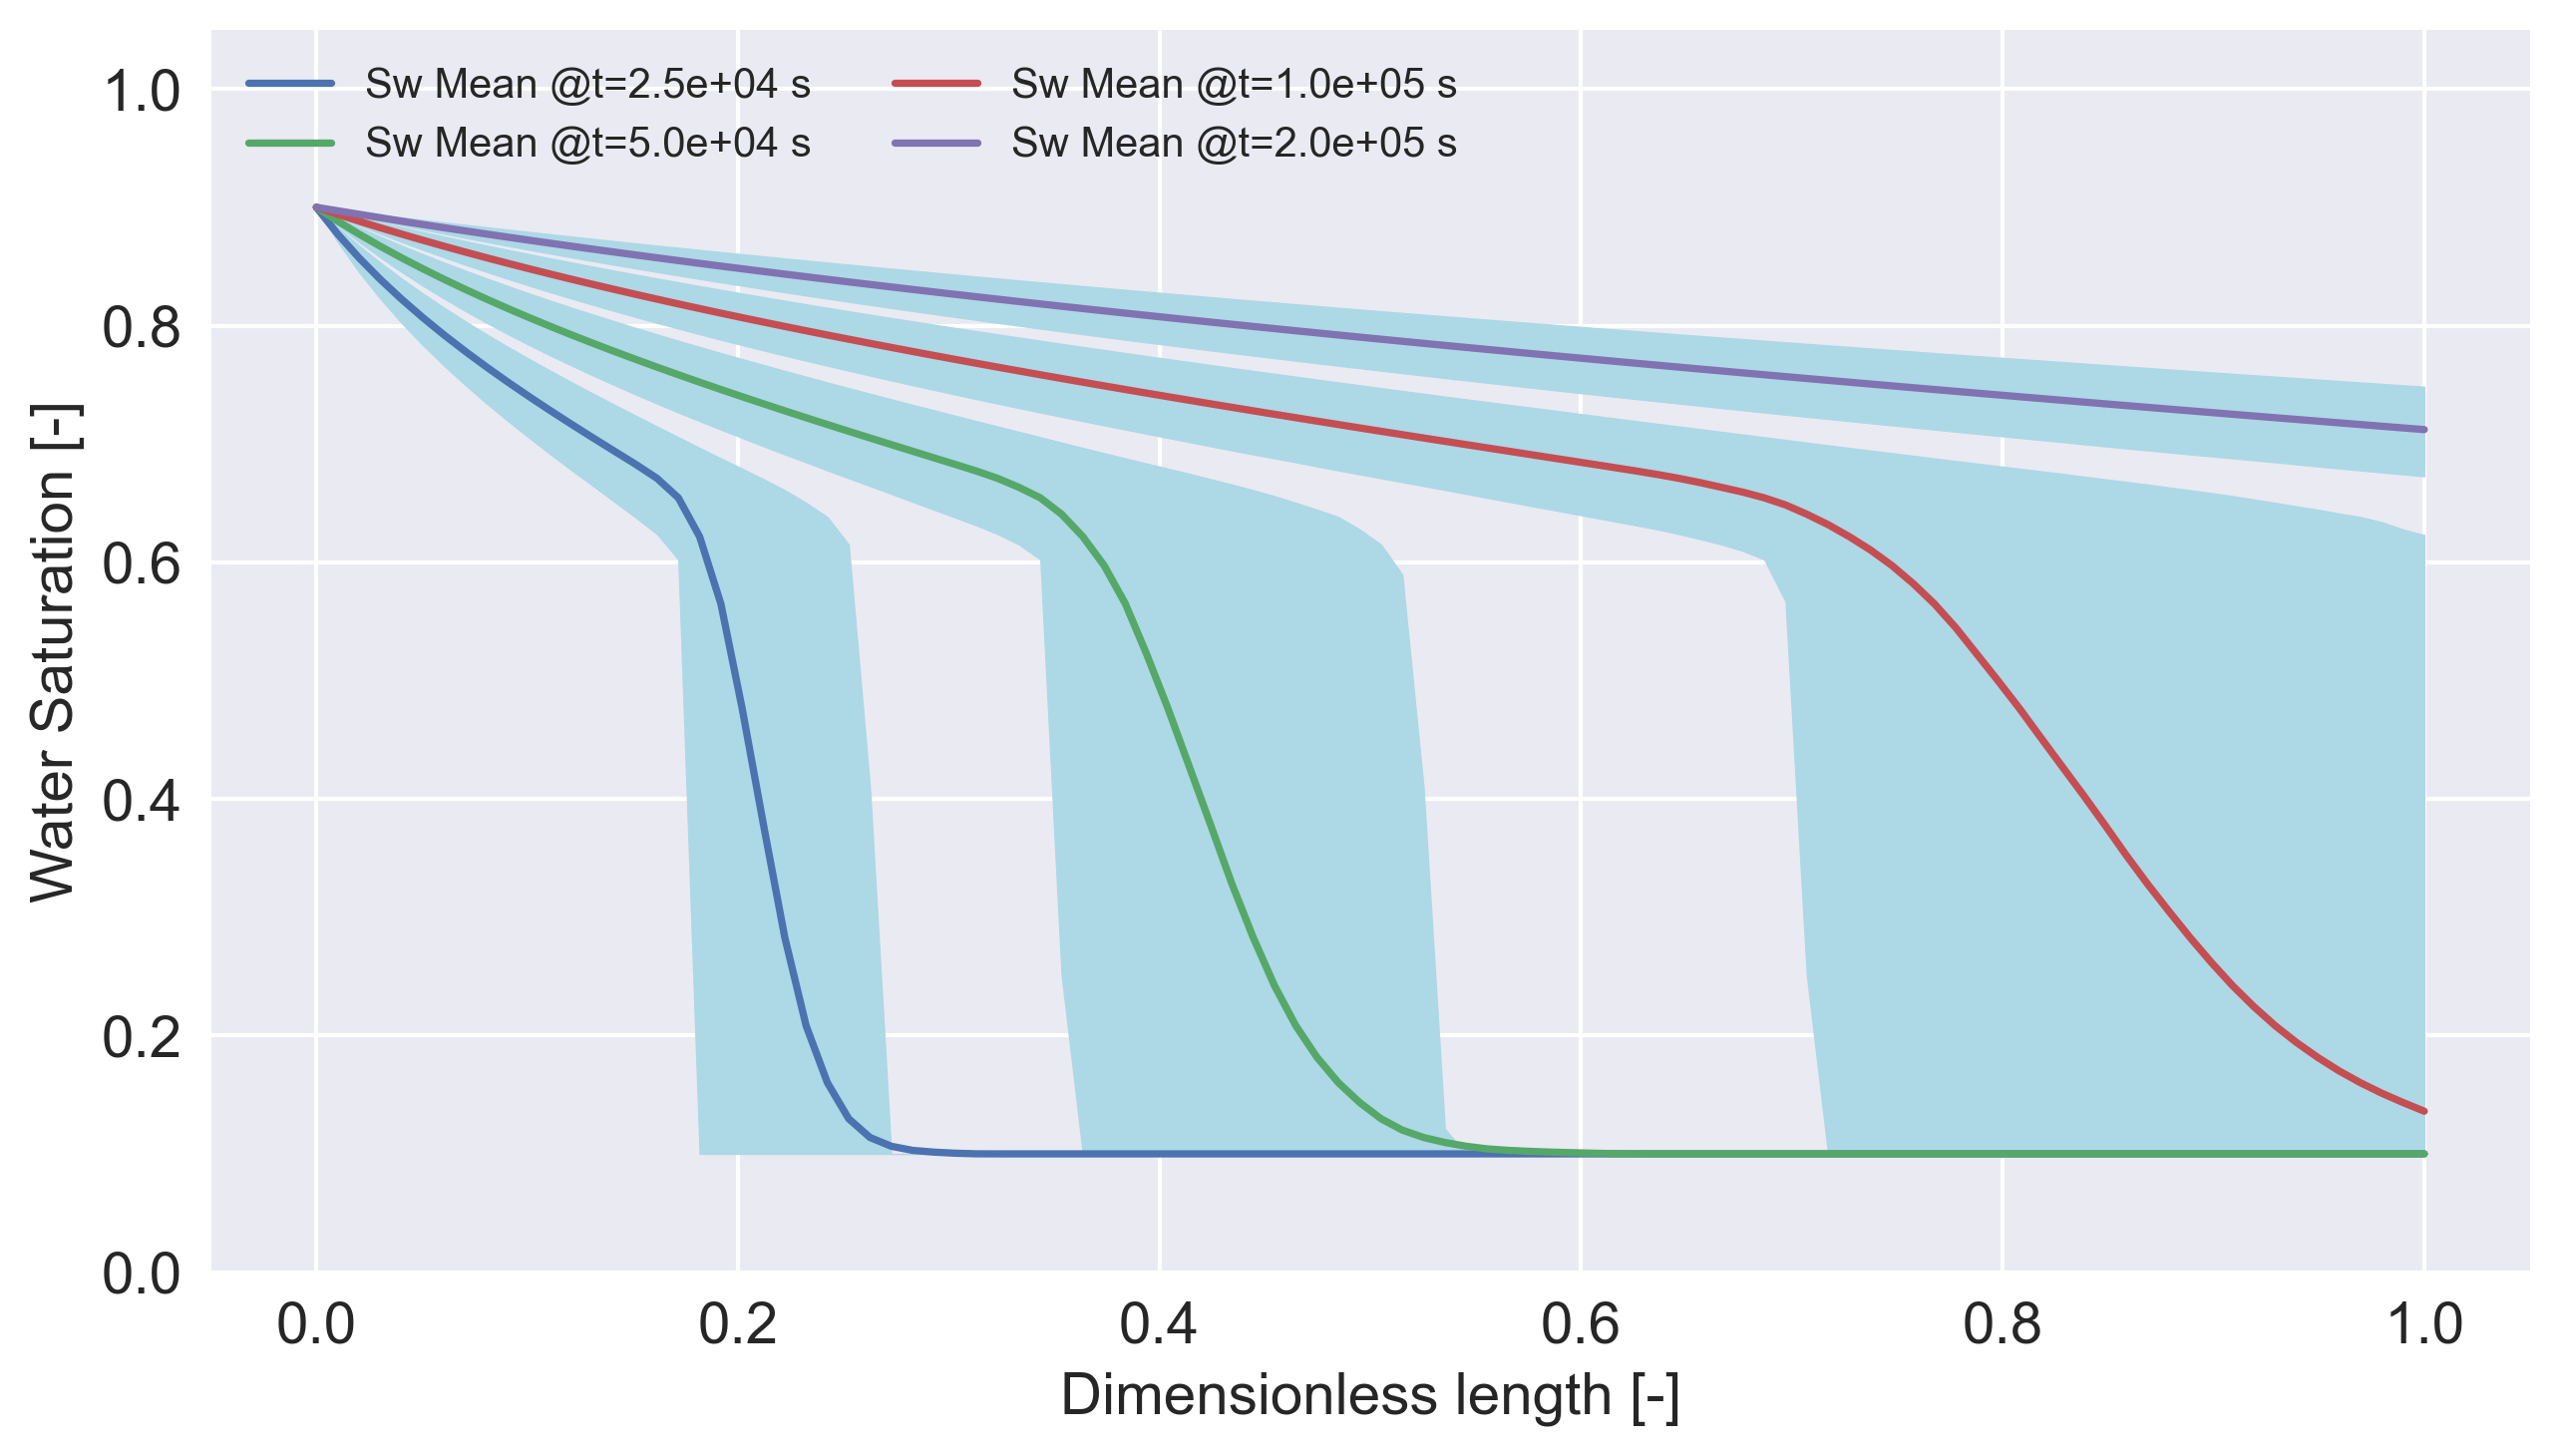

No handles with labels found to put in legend.


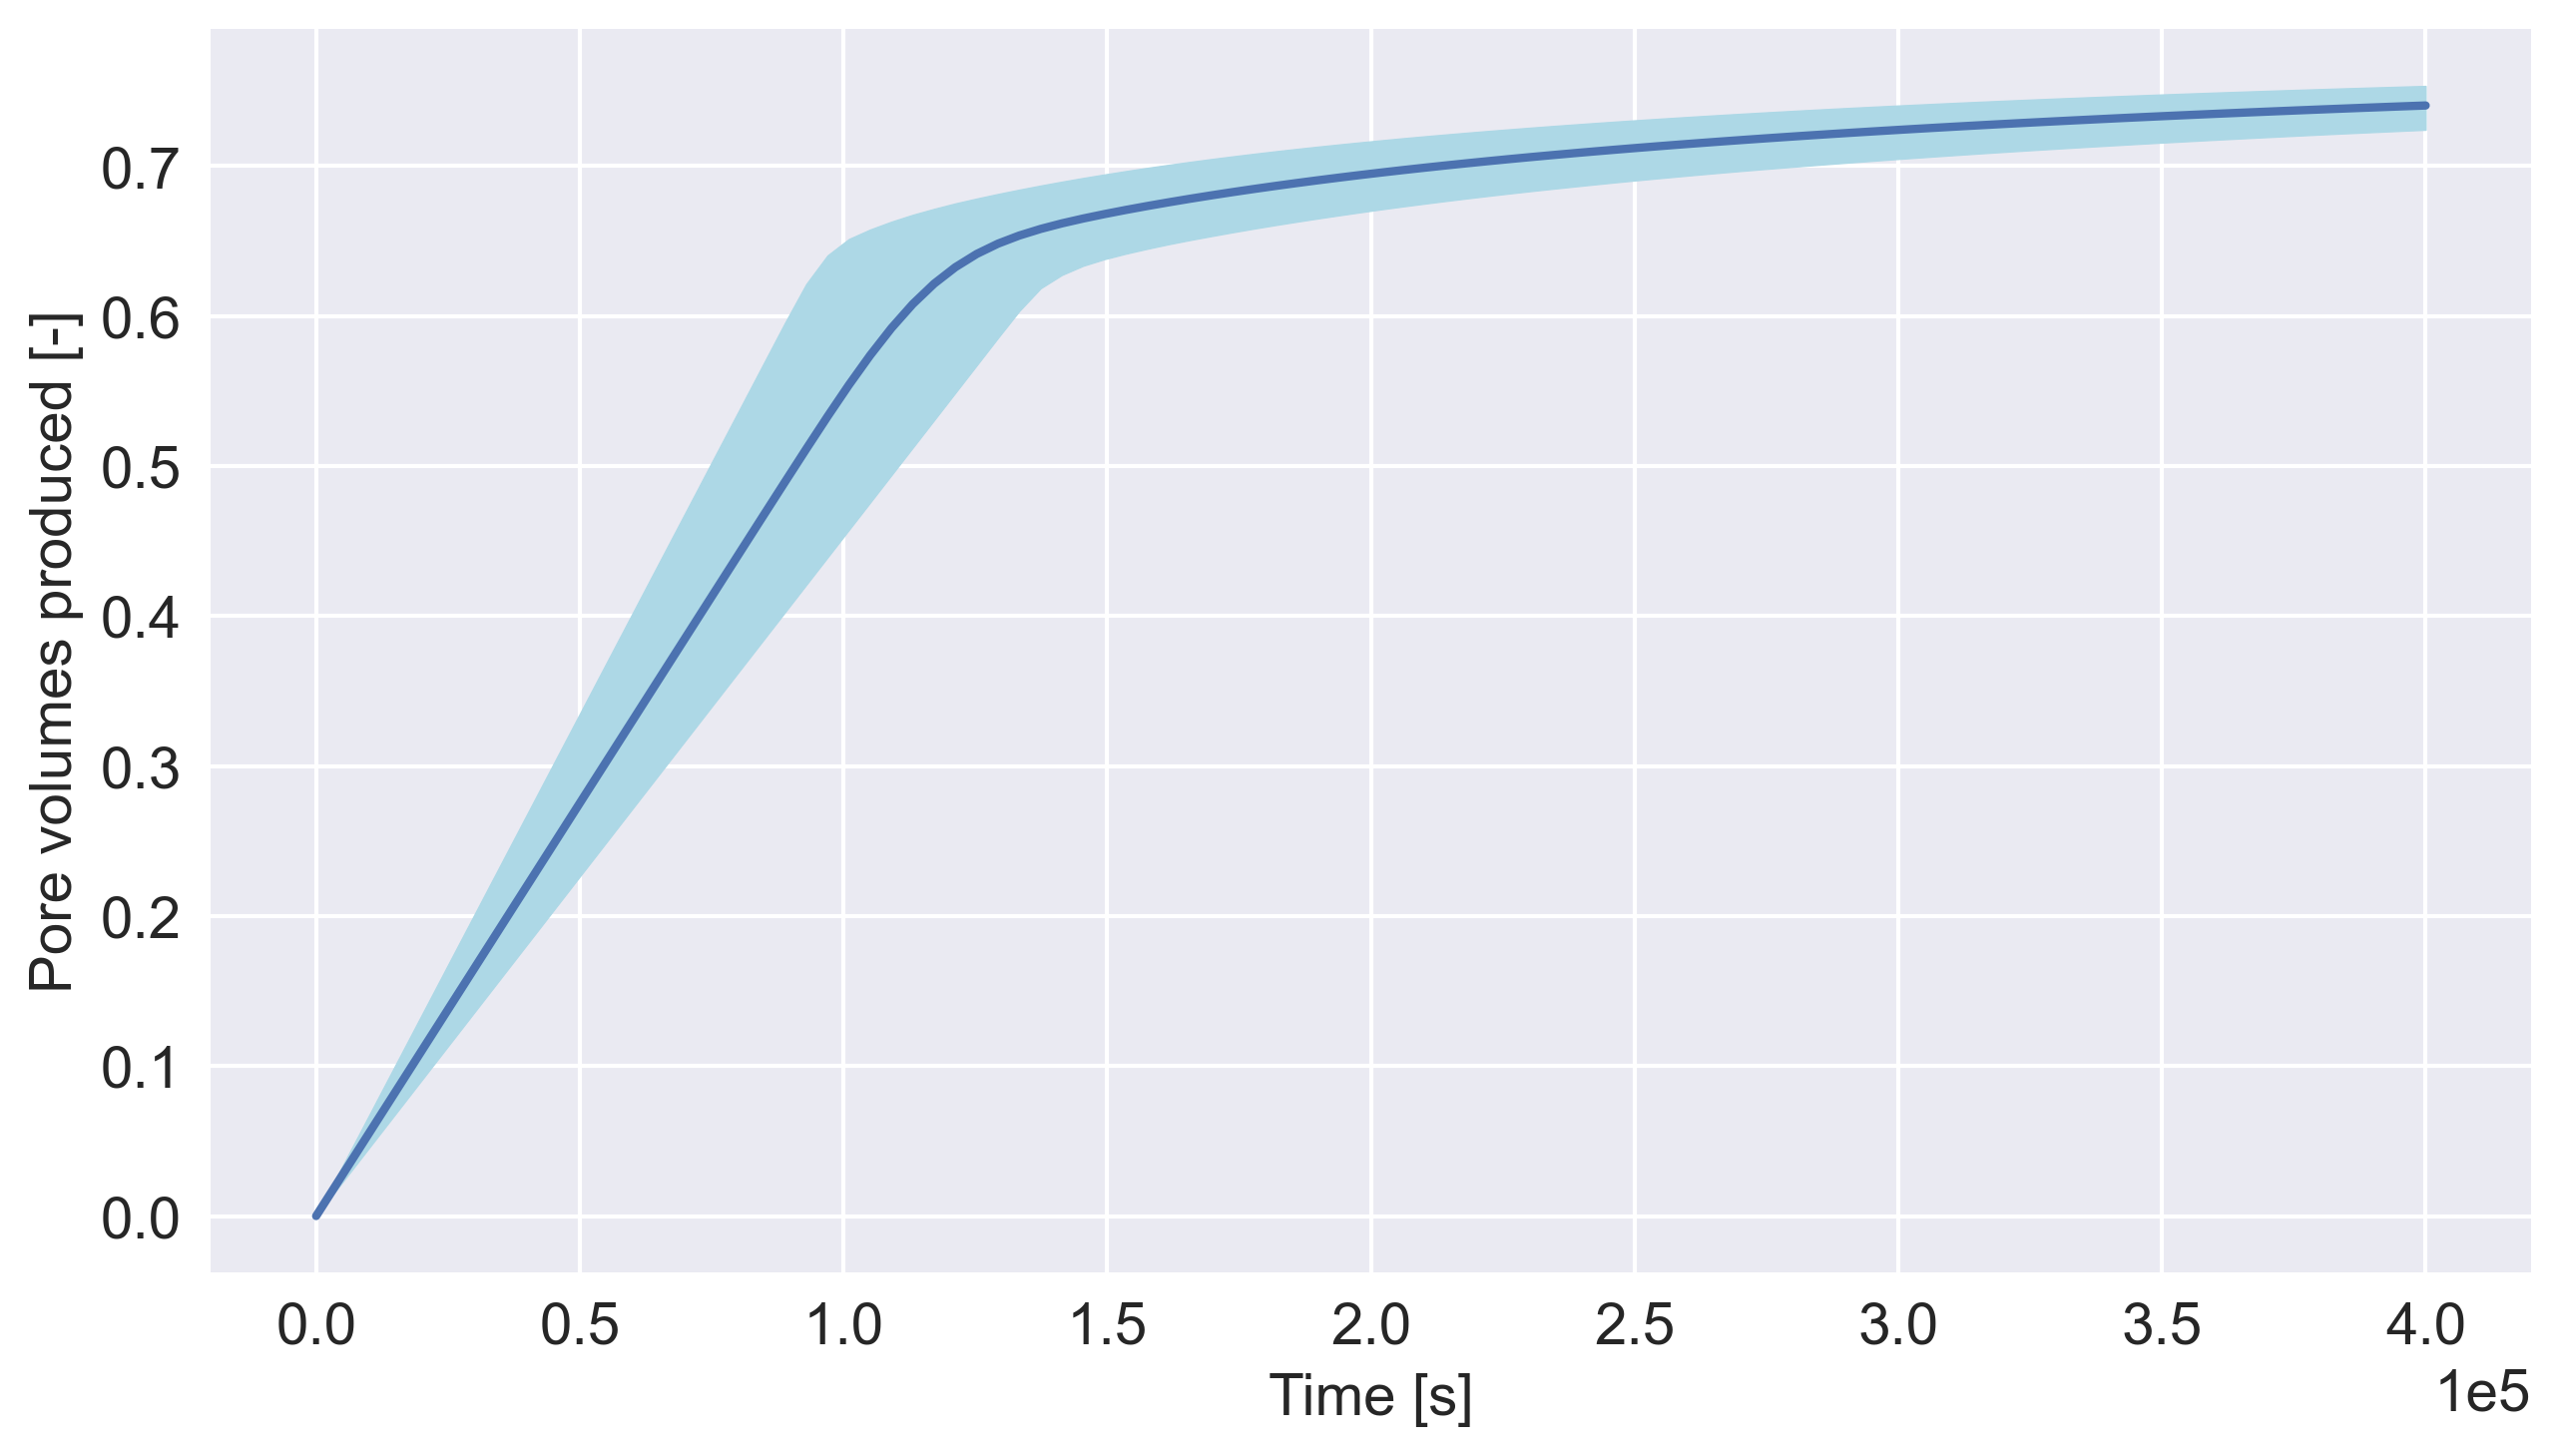

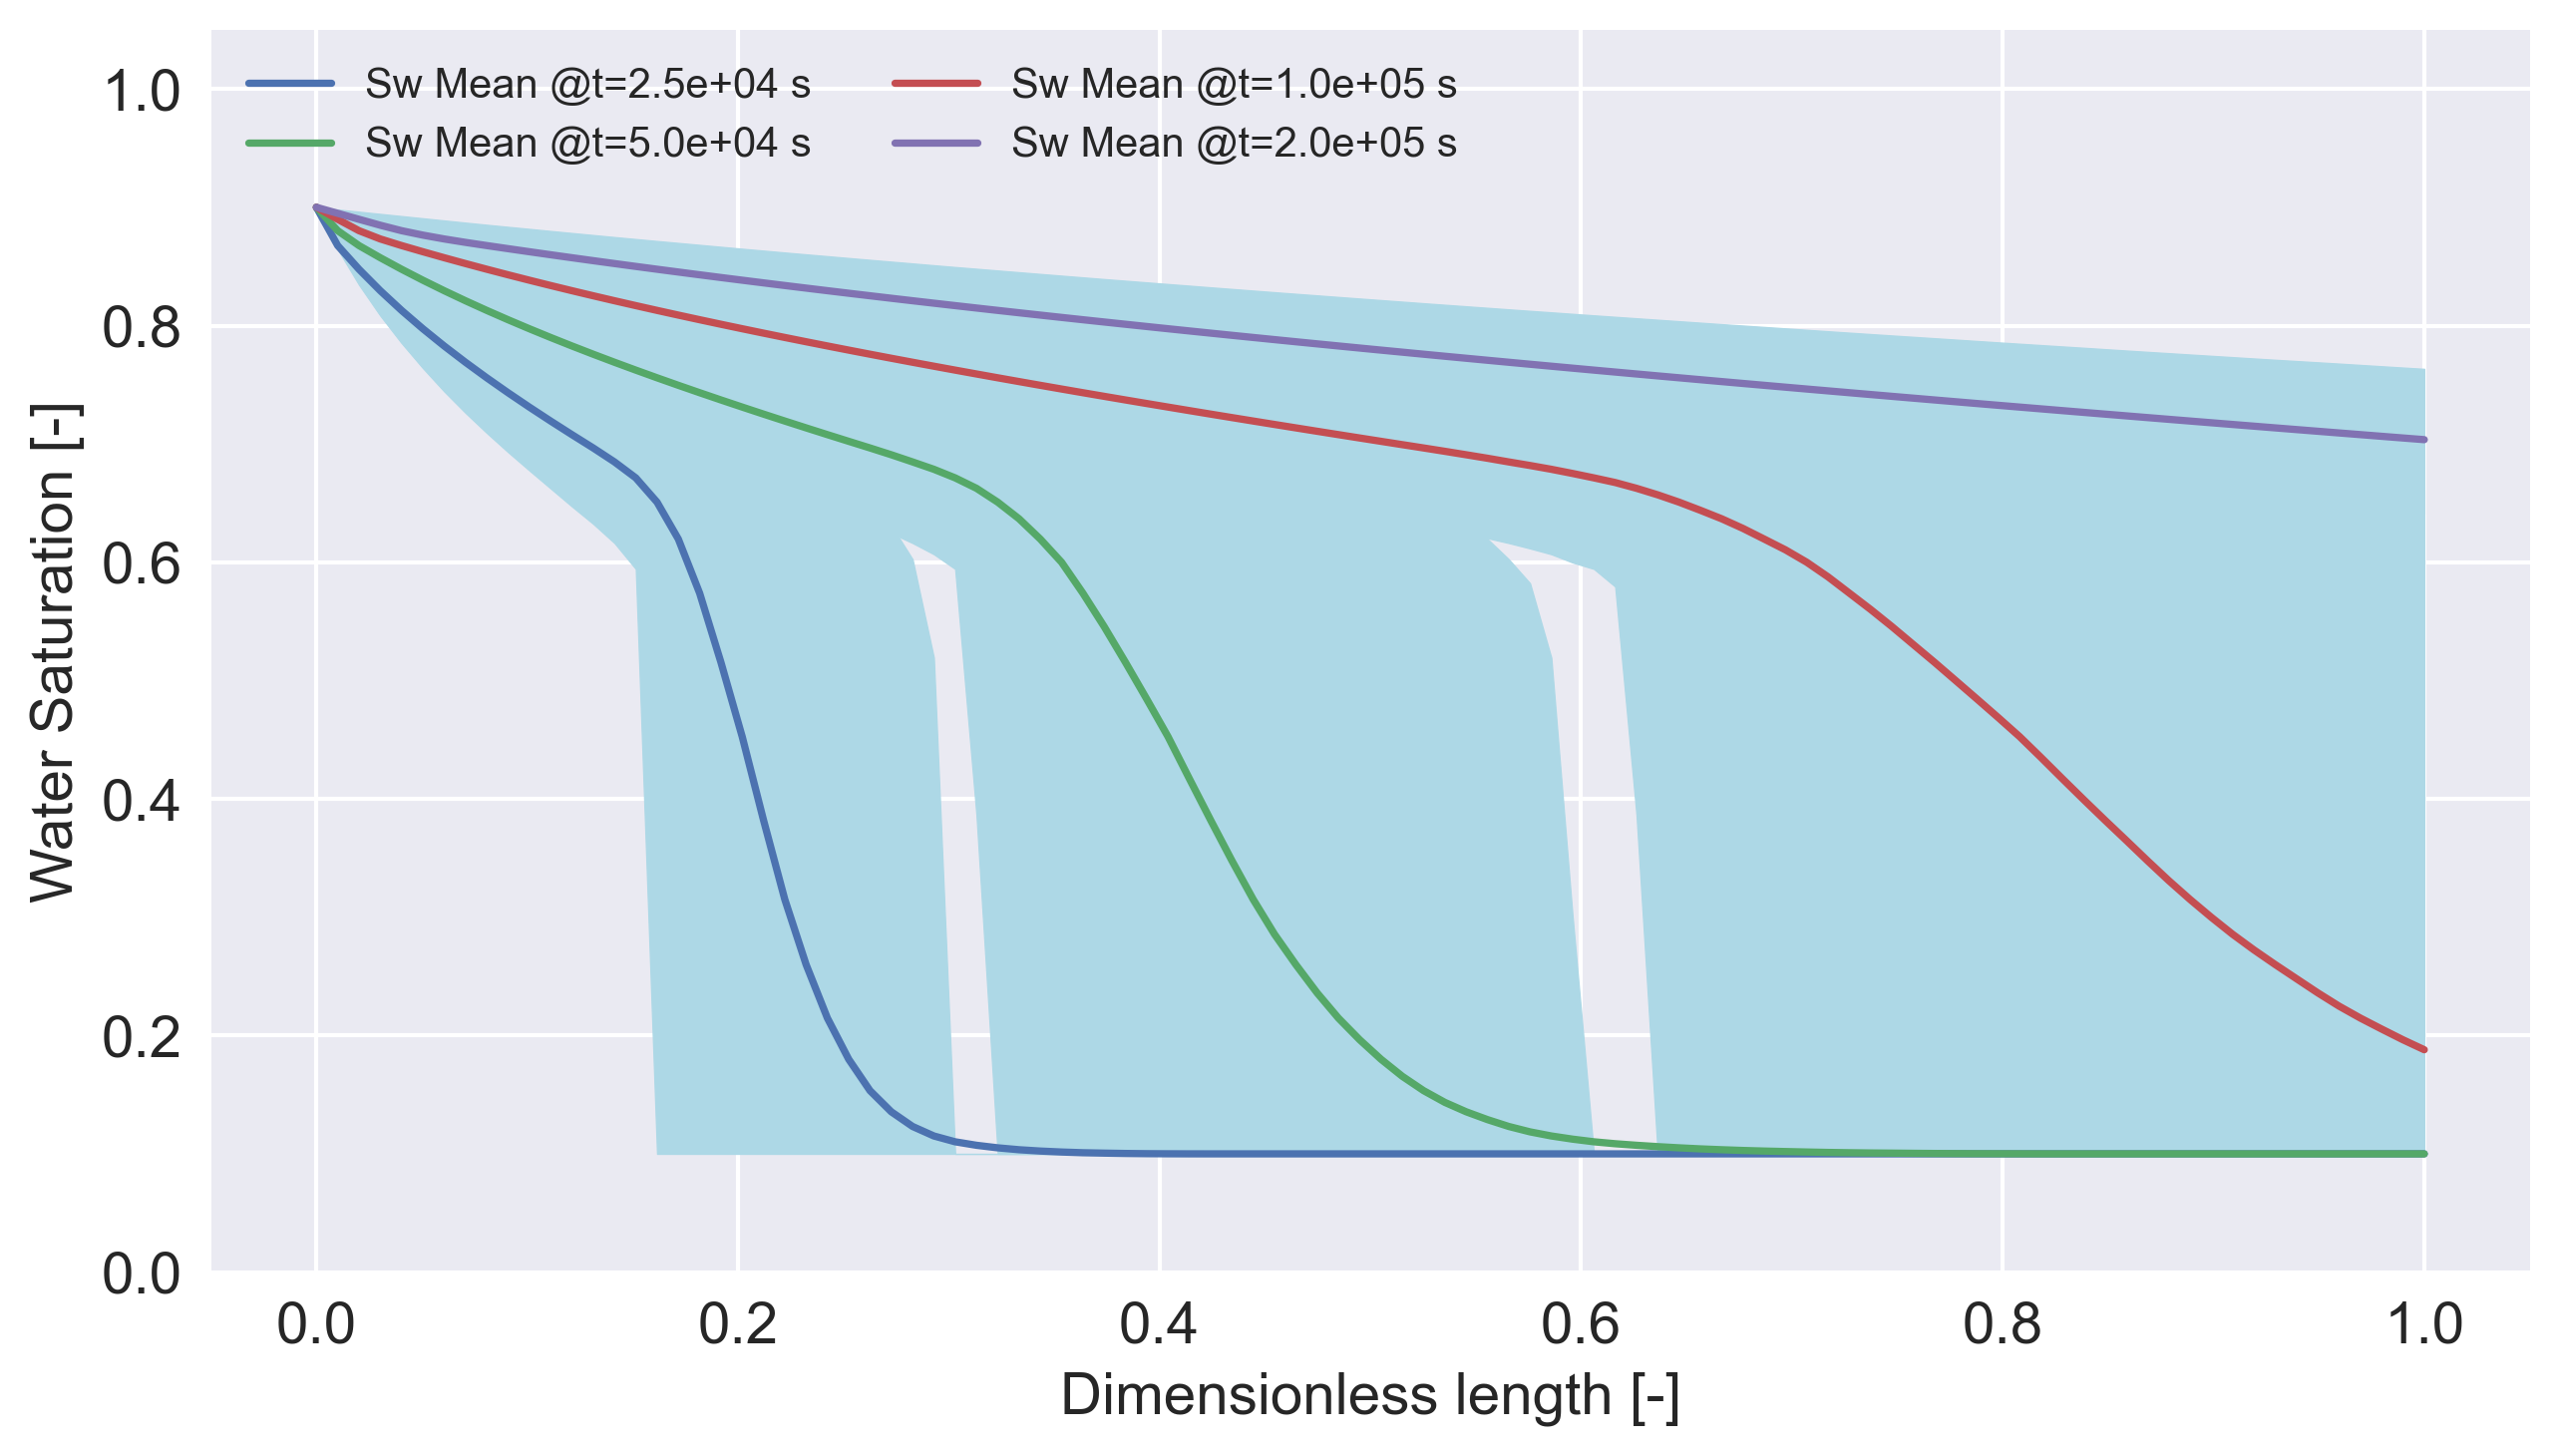

No handles with labels found to put in legend.


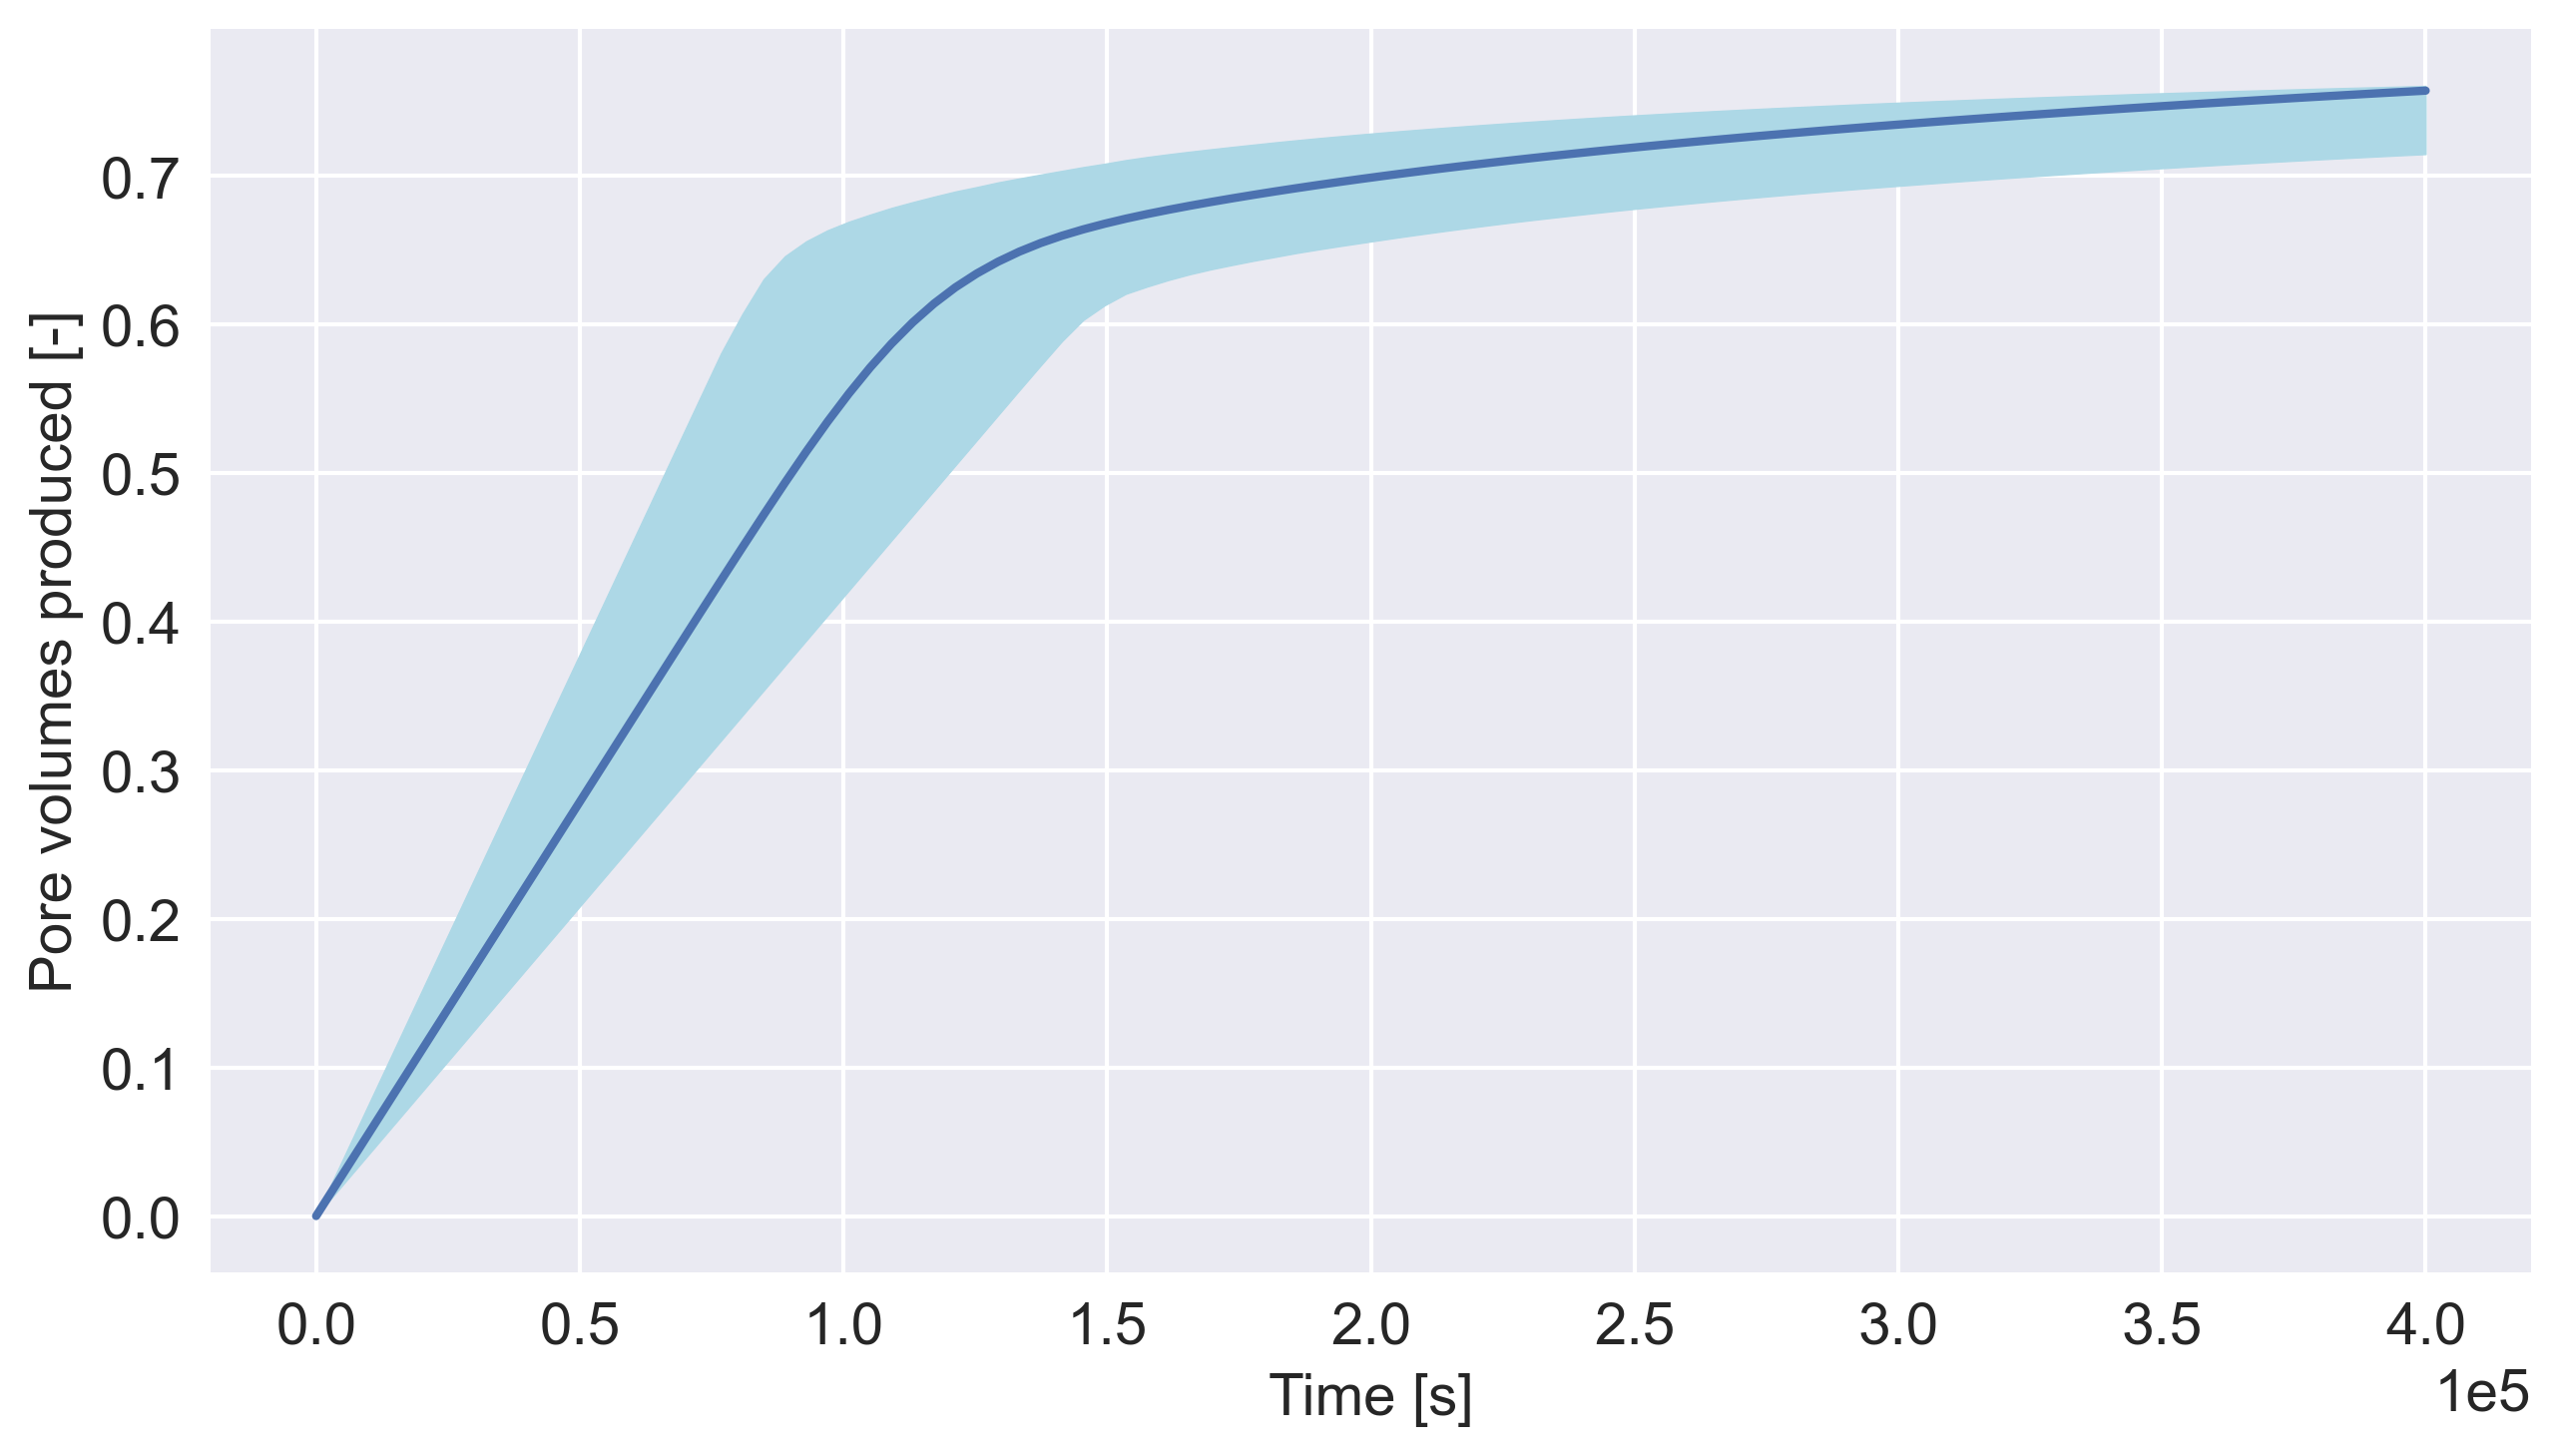

In [181]:
scenario = 1
for xd, mean_sw, sw_upp, sw_low, time, mean_npd, npd_upp, npd_low, npd_squared_integral in zip( \
    xds, means_sw, sws_upp, sws_low, times, means_npd, npds_upp, npds_low, npds_squared_integral):

    # plot mean and percentiles
    fig = plt.figure()
    for m, su, sl, ot in zip(mean_sw, sw_upp, sw_low, output_times):
        plt.plot(xd, m, label='Sw Mean @t=' + str("{:.1e}".format(ot)) + ' s')
        plt.fill_between(xd, su, sl, color='lightblue')
    plt.xlabel('Dimensionless length [-]')
    plt.ylim([0.0, 1.05])
    plt.ylabel('Water Saturation [-]')
    plt.legend(loc=2, ncol=2)
    fig.set_figwidth(10)
    plt.savefig('swat_scenario' + str(scenario) + '.png')
    plt.show()

    fig2 = plt.figure()
    plt.plot(time, mean_npd, lw=2)
    plt.fill_between(time, npd_upp, npd_low, color='lightblue')
    plt.xlabel('Time [s]')
    plt.ylabel('Pore volumes produced [-]')
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.legend()
    fig2.set_figwidth(10)
    plt.savefig('npd_scenario' + str(scenario) + '.png')
    plt.show()

    scenario +=1

## Plot the distributions used to generate these results

In [163]:
from create_histogram import randon_variable_pdf

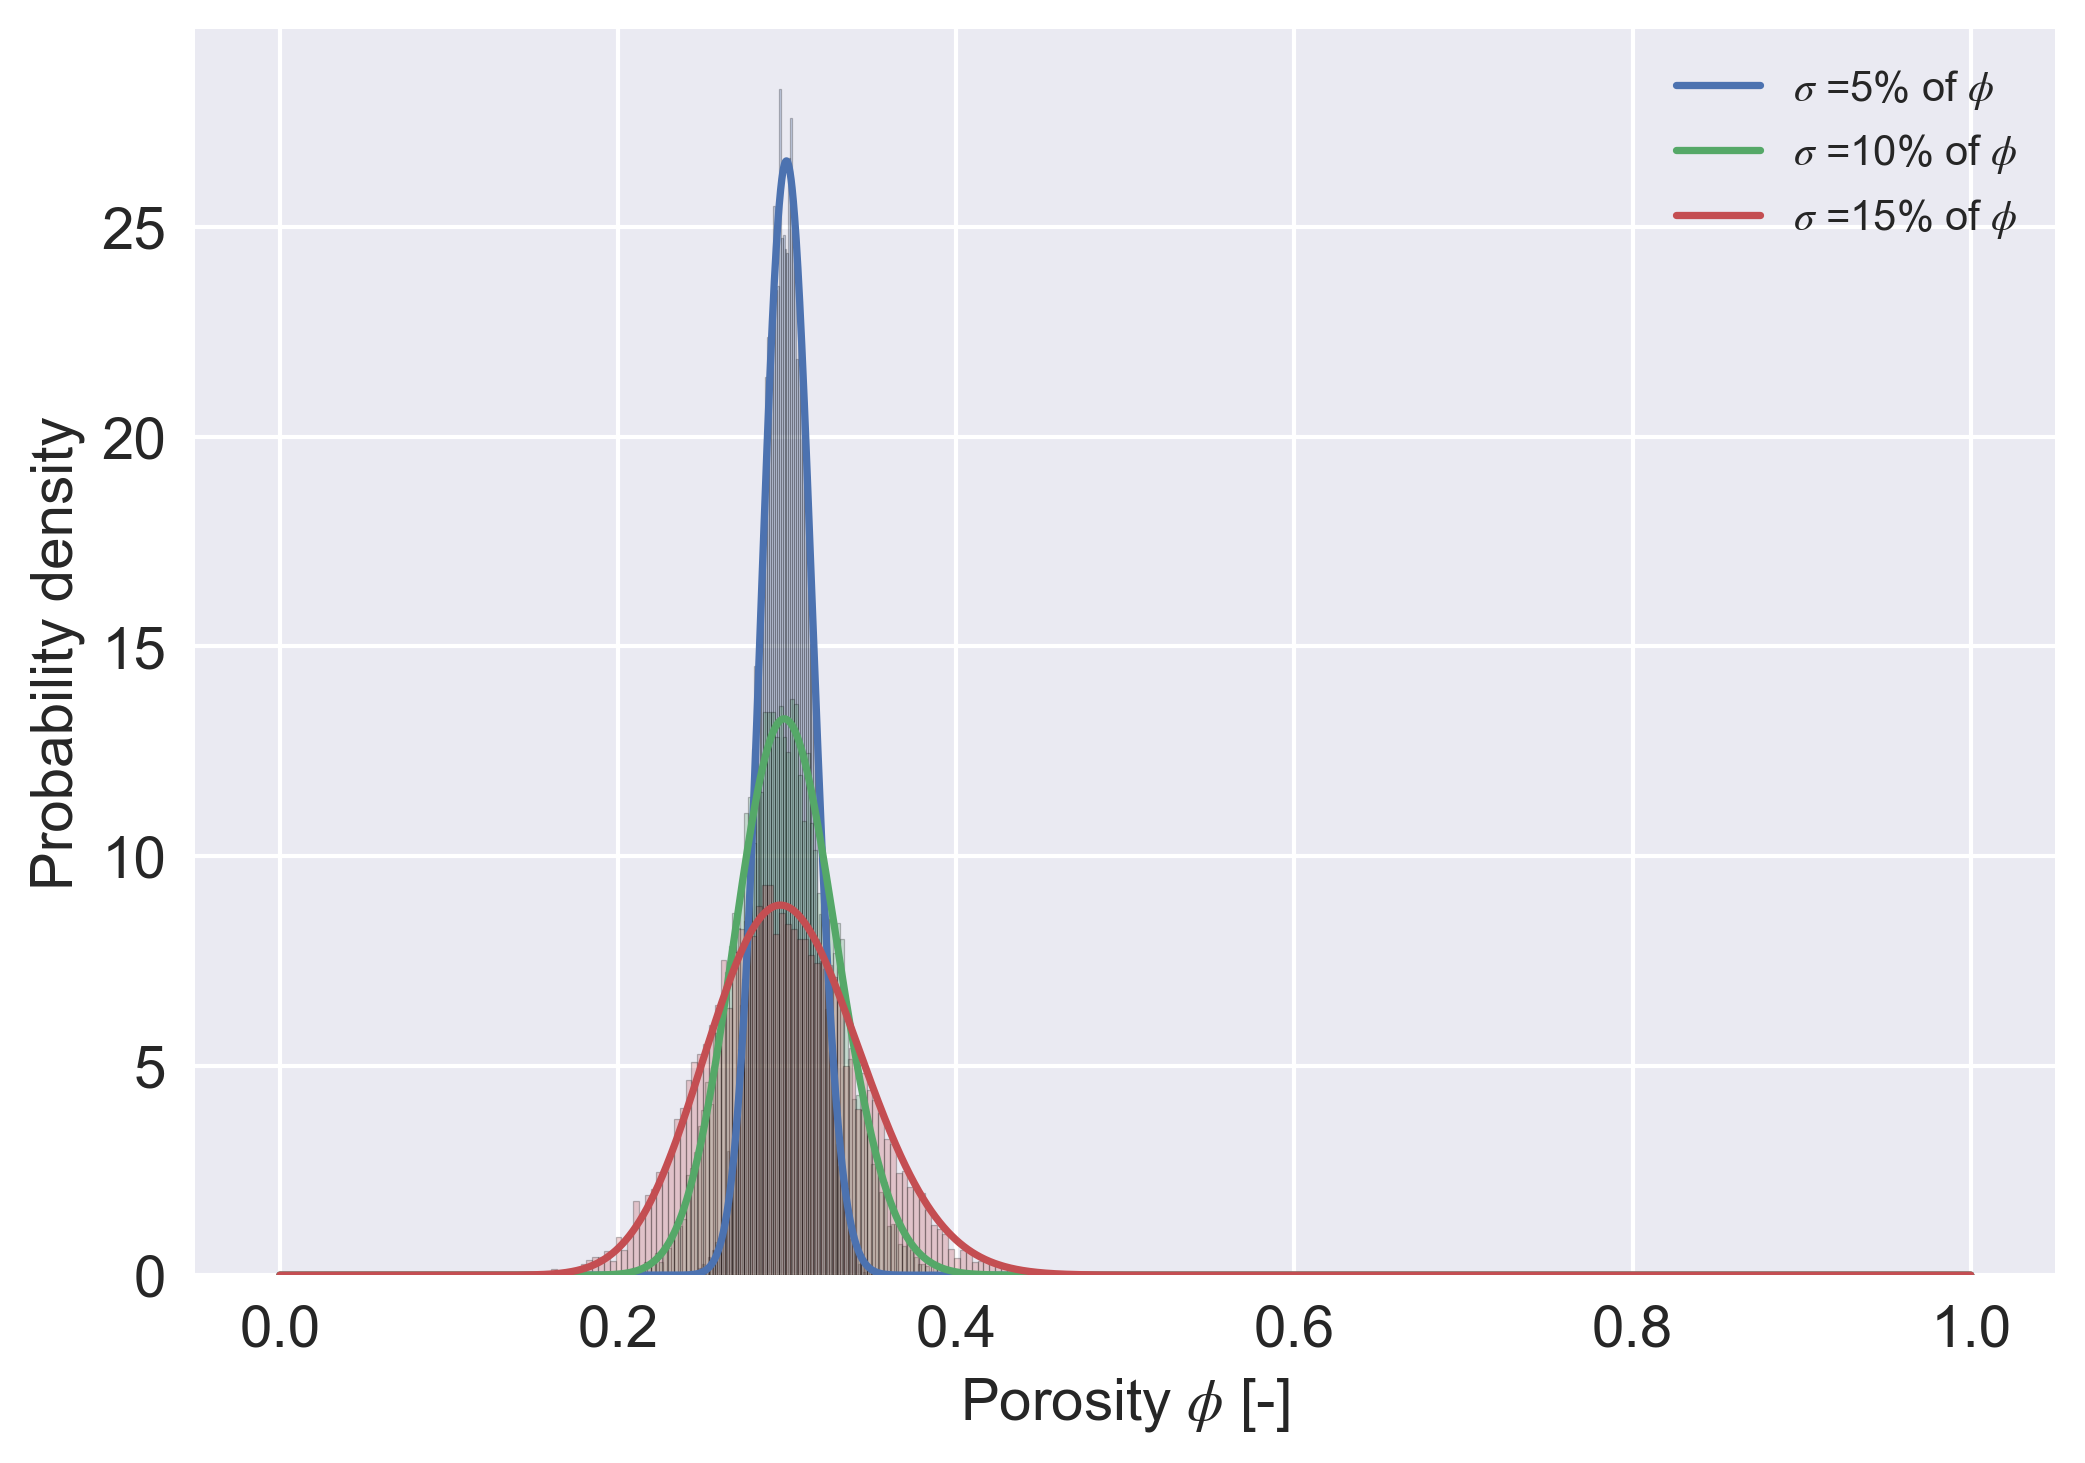

In [164]:
samples = np.load('porosity_samples.npy')
factors = np.load('porosity_factors.npy')
pdfs = np.load('porosity_pdfs.npy')

fig2 = plt.figure()
number_of_bins = round(math.sqrt(len(samples[0])))
for f, d, s in zip(factors, pdfs, samples):
    X_bins, X_freq, X_area , = randon_variable_pdf(s , number_of_bins)
    X_binwidth = X_bins[0] - X_bins[1]

    plt.bar(X_bins , X_freq , X_binwidth , align='edge', edgecolor='k', alpha=0.25)
    plt.plot(d[0], d[1], '-', label=r'$\sigma$ =' + str(int(f)) + '% of $\phi$')
plt.legend()
plt.xlabel('Porosity $\phi$ [-]')
plt.ylabel('Probability density')
plt.savefig('porosity-distribution.png')

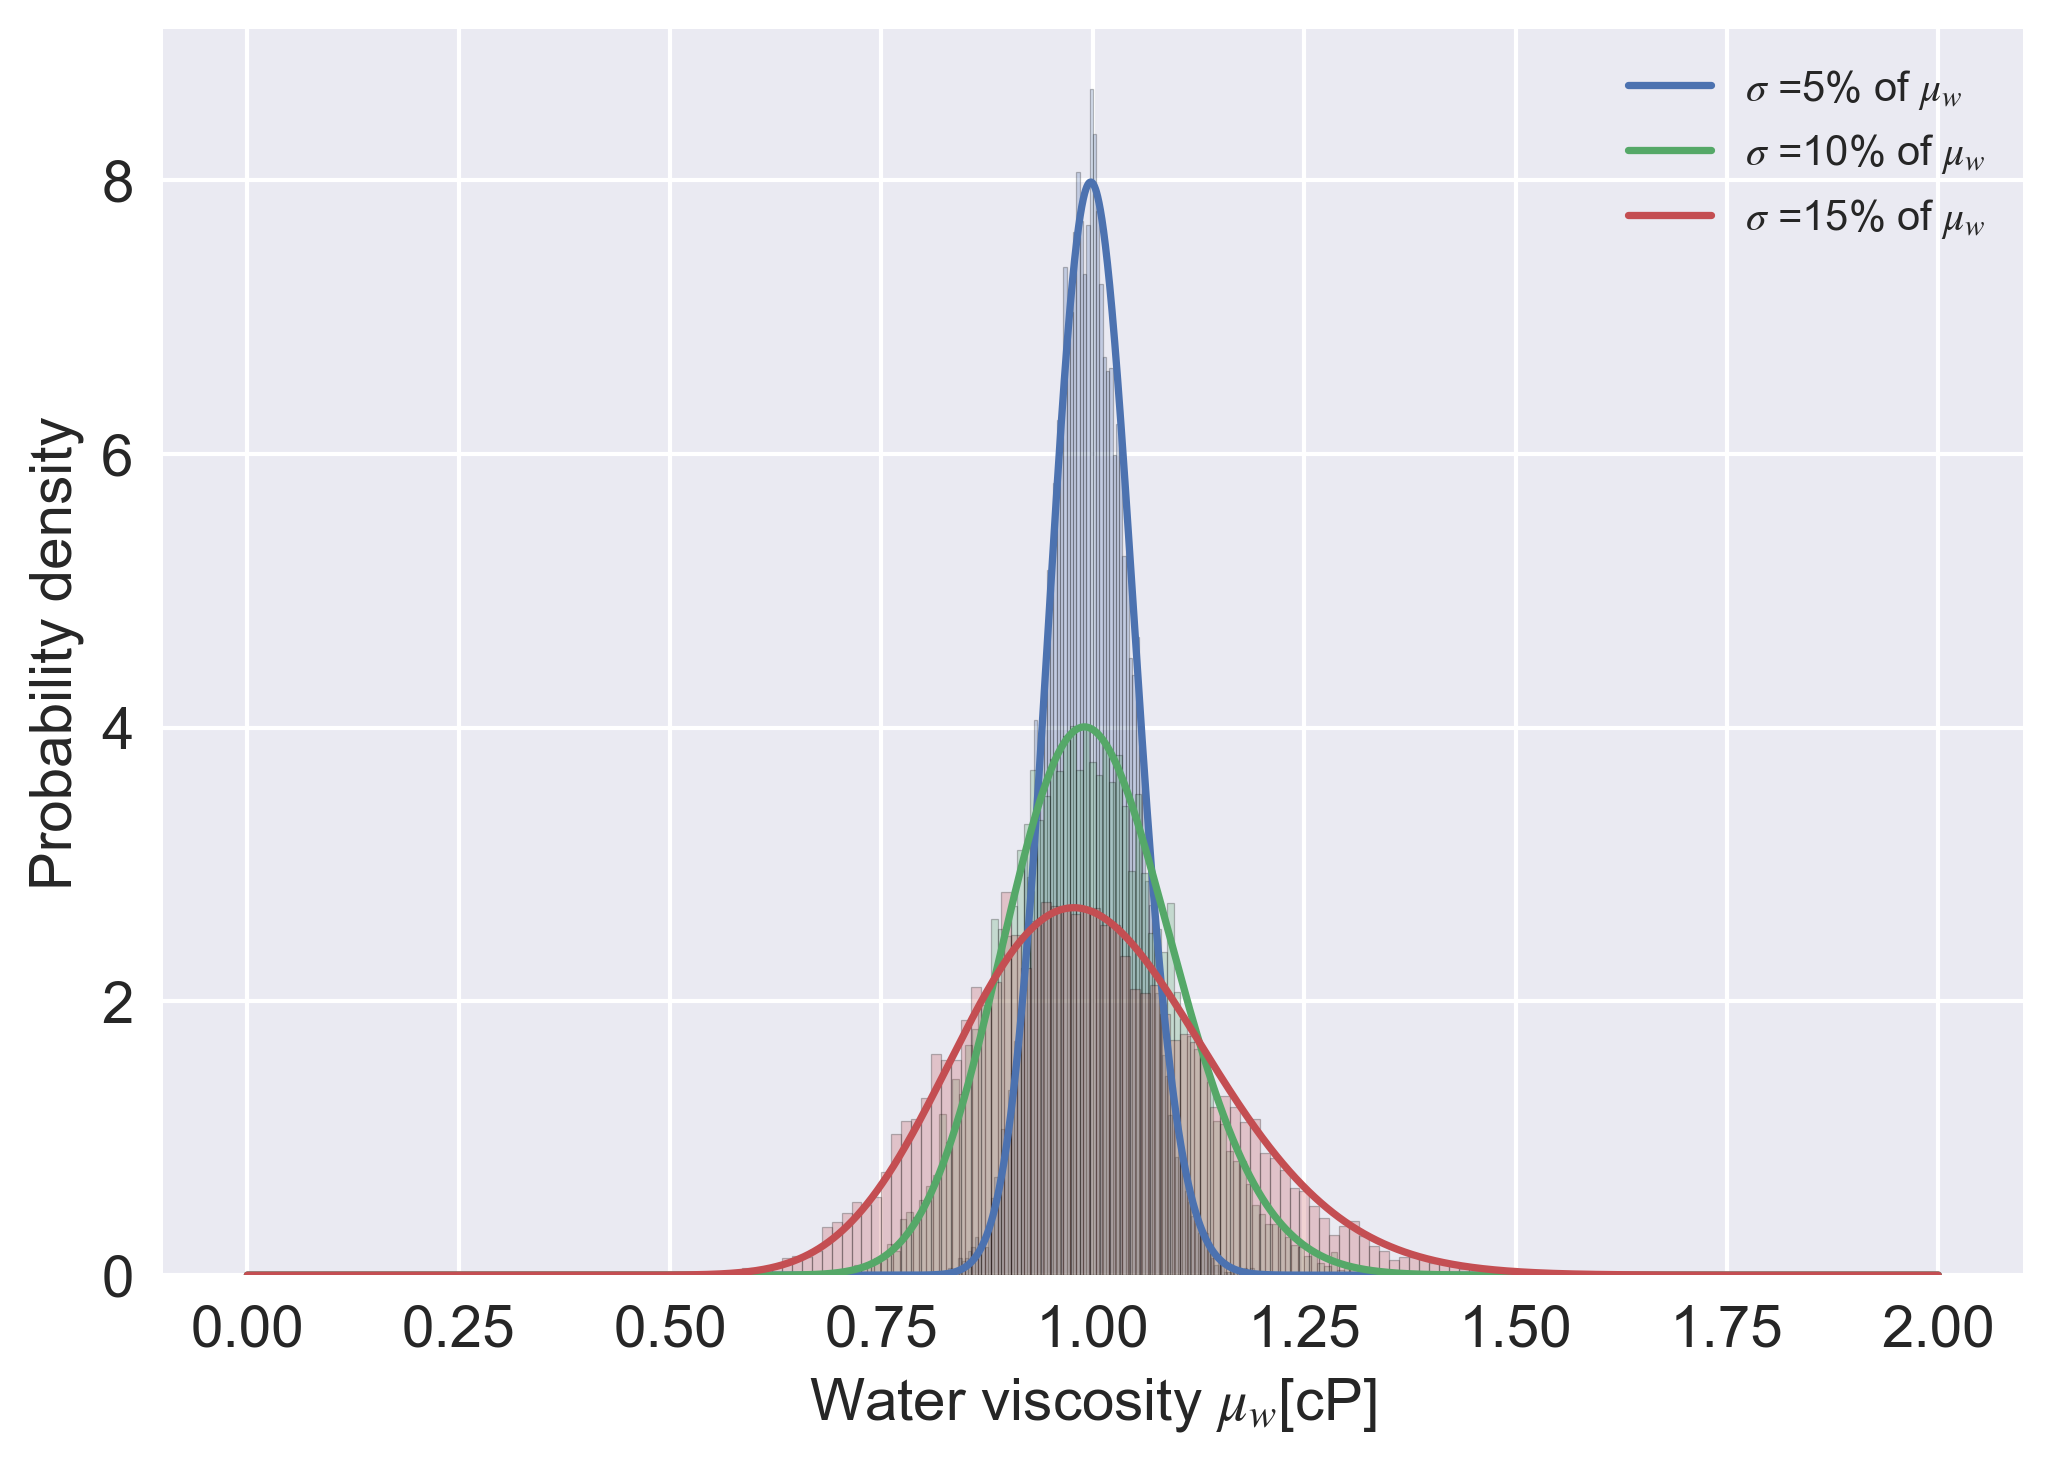

In [165]:
samples = np.load('water_viscosity_samples.npy')
factors = np.load('water_viscosity_factors.npy')
pdfs = np.load('water_viscosity_pdfs.npy')


fig2 = plt.figure()
number_of_bins = round(math.sqrt(len(samples[0])))
for f, d, s in zip(factors, pdfs, samples):
    X_bins, X_freq, X_area , = randon_variable_pdf(s , number_of_bins)
    X_binwidth = X_bins[0] - X_bins[1]

    plt.bar(X_bins , X_freq , X_binwidth , align='edge', edgecolor='k', alpha=0.25)
    plt.plot(d[0], d[1], '-', label=r'$\sigma$ =' + str(int(f)) + '% of $\mu_w$')
plt.legend()
plt.xlabel('Water viscosity $\mu_w$[cP]')
plt.ylabel('Probability density')
plt.savefig('water-viscosity-distribution.png')


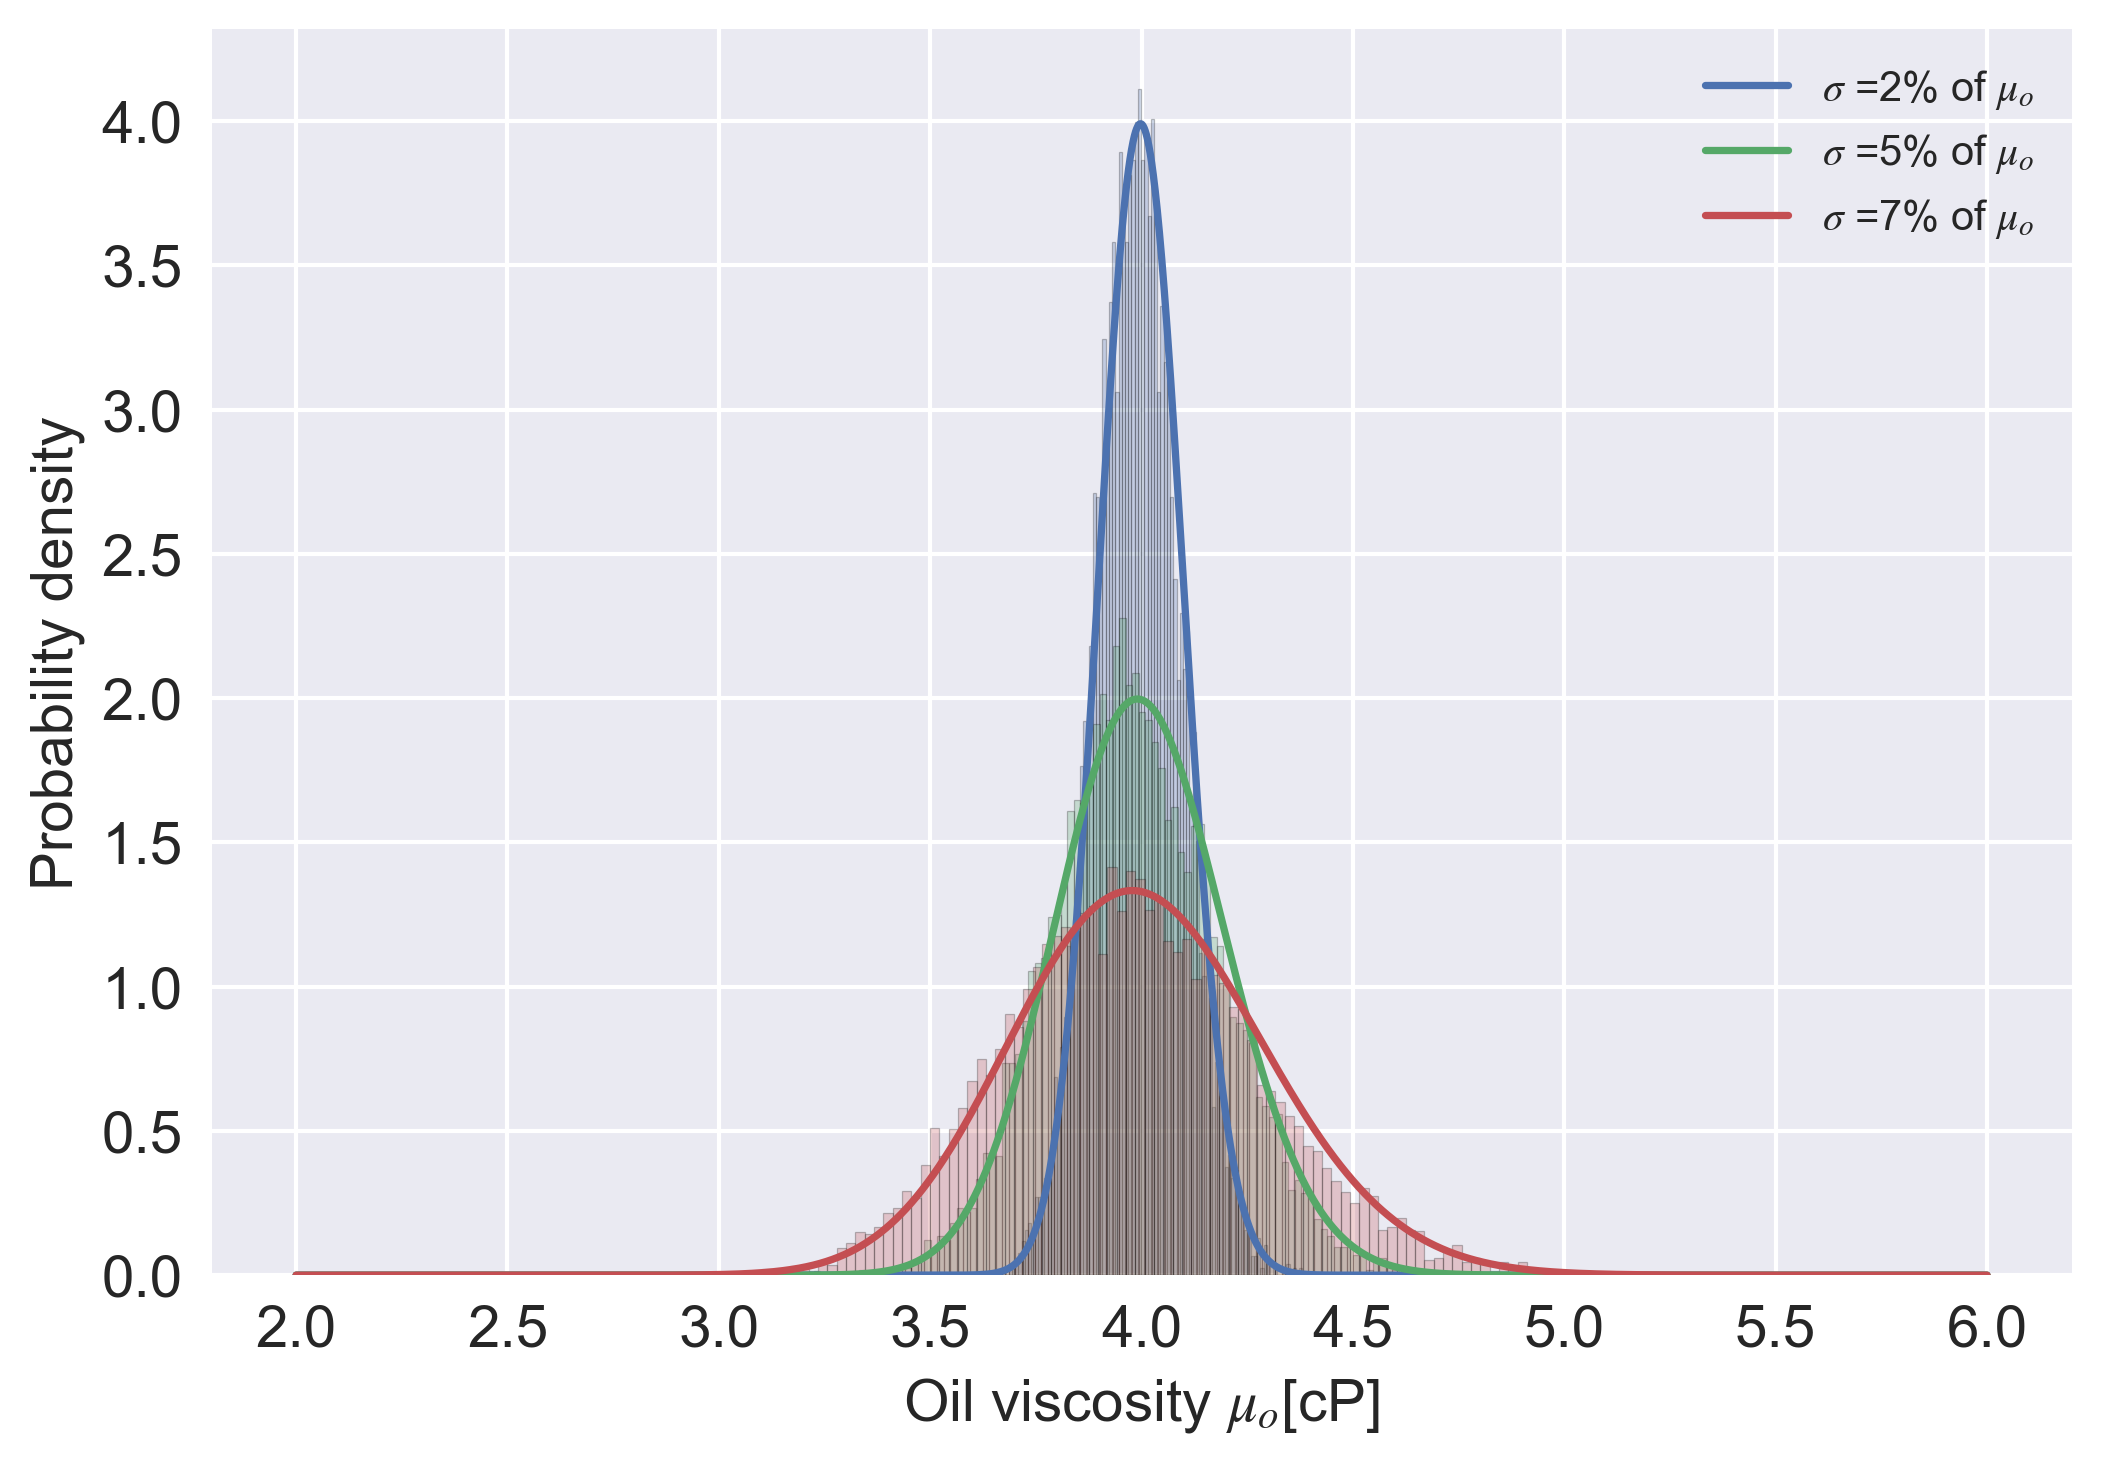

In [166]:
samples = np.load('oil_viscosity_samples.npy')
factors = np.load('oil_viscosity_factors.npy')
pdfs = np.load('oil_viscosity_pdfs.npy')


fig2 = plt.figure()
number_of_bins = round(math.sqrt(len(samples[0])))
for f, d, s in zip(factors, pdfs, samples):
    X_bins, X_freq, X_area , = randon_variable_pdf(s , number_of_bins)
    X_binwidth = X_bins[0] - X_bins[1]

    plt.bar(X_bins , X_freq , X_binwidth , align='edge', edgecolor='k', alpha=0.25)
    plt.plot(d[0], d[1], '-', label=r'$\sigma$ =' + str(int(f)) + '% of $\mu_o$')
plt.legend()
plt.xlabel('Oil viscosity $\mu_o$[cP]')
plt.ylabel('Probability density')
plt.savefig('oil-viscosity-distribution.png')

## Obtain an example of deterministic solution

In [167]:
from buckley_leverett import buckley_solution

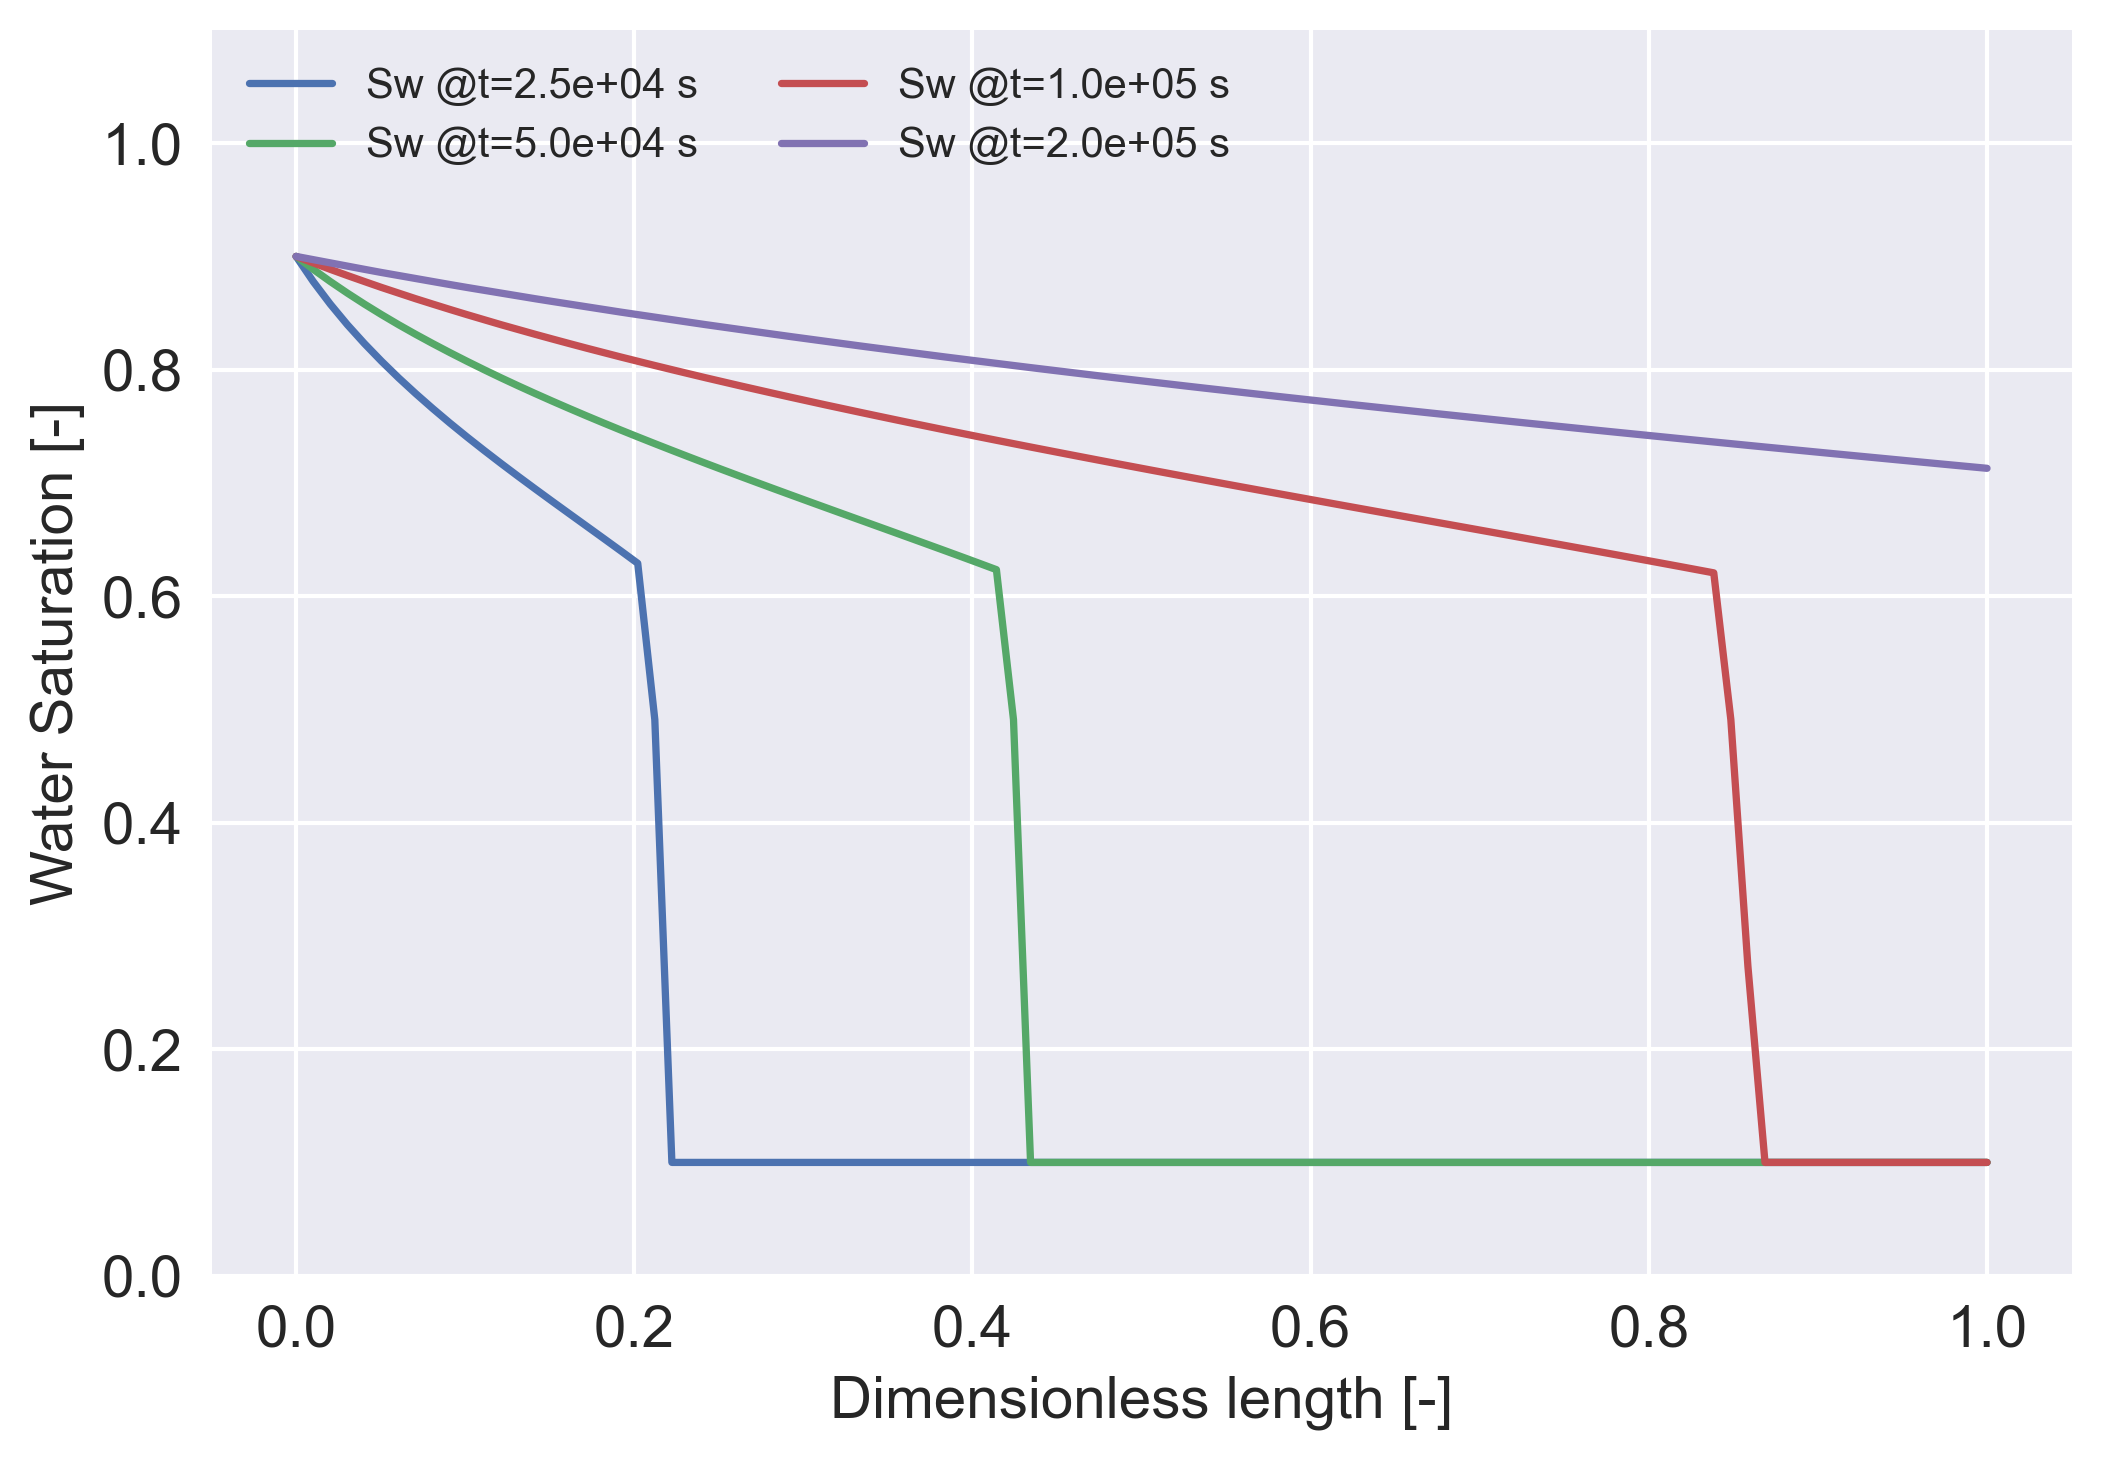

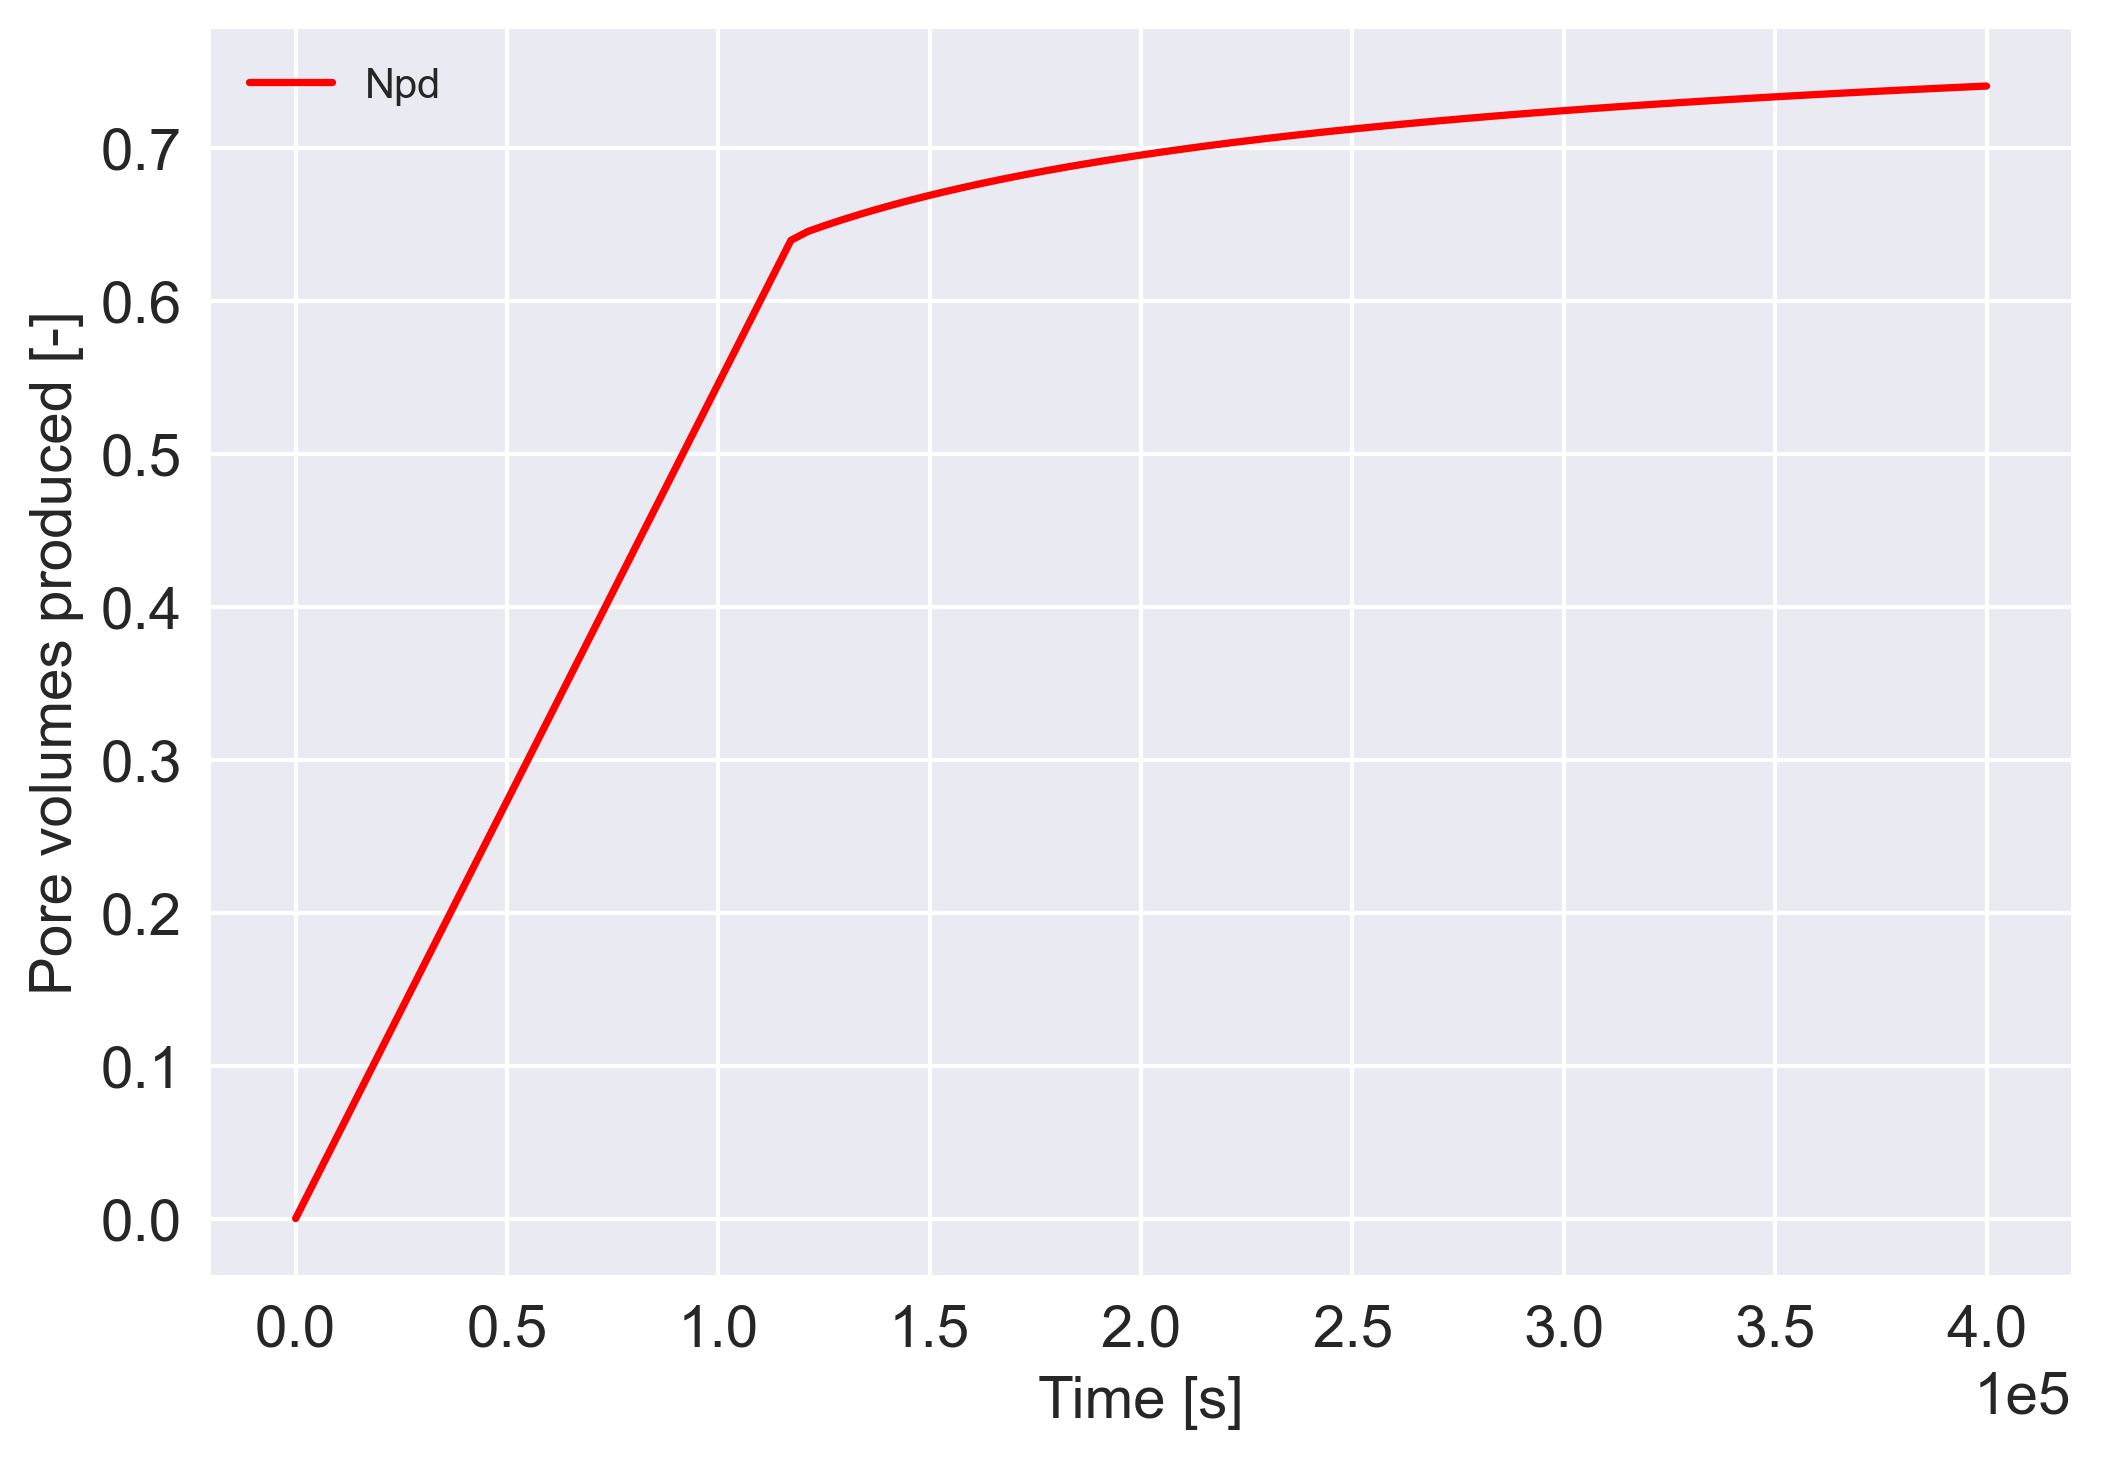

In [168]:
aw = 0.2        # coefficient for perm water - max(krw)
bw = 1.5        # water exponent relative permeability
ao = 0.80       # coefficient for perm oil - max(krw)
bo = 2.0         # oil exponent relative permeability
sw_min = 0.1    # min water saturation values
sw_max = 0.9    # max water saturation values
mu_w = 1.0      # water viscosity in centipoise
mu_o = 4.0      # oil viscosity in centipoise

total_simulation_time = 4.0e5  # s
porosity = 0.3  # m3/m3
diameter = 0.036  # m
length = 0.12  # m
injection_rate = 2e-10  # m3/s
output_times = [2.5e4, 5e4, 1e5, 2e5] # seconds
xd, sw_profiles, td, npd = buckley_solution(total_simulation_time, porosity, diameter, length, injection_rate, mu_w, mu_o, aw, bw, ao, bo, sw_min, sw_max, output_times)

fig = plt.figure()
for s, ot in zip(sw_profiles, output_times):
    plt.plot(xd, s, label='Sw @t=' + str("{:.1e}".format(ot)) + ' s')

plt.ylim(0, 1.1)
plt.grid(True)
plt.xlabel('Dimensionless length [-]')
plt.ylabel('Water Saturation [-]')
plt.legend(loc=2, ncol=2)
plt.savefig('saturation-versus-time.png')

fig2 = plt.figure()
plt.plot(td, npd, '-r', label='Npd')
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Pore volumes produced [-]')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend()
plt.savefig('npd-versus-td.png')

In [169]:
from buckley_leverett import krw, kro, fractional_flow, fractional_flow_derivative

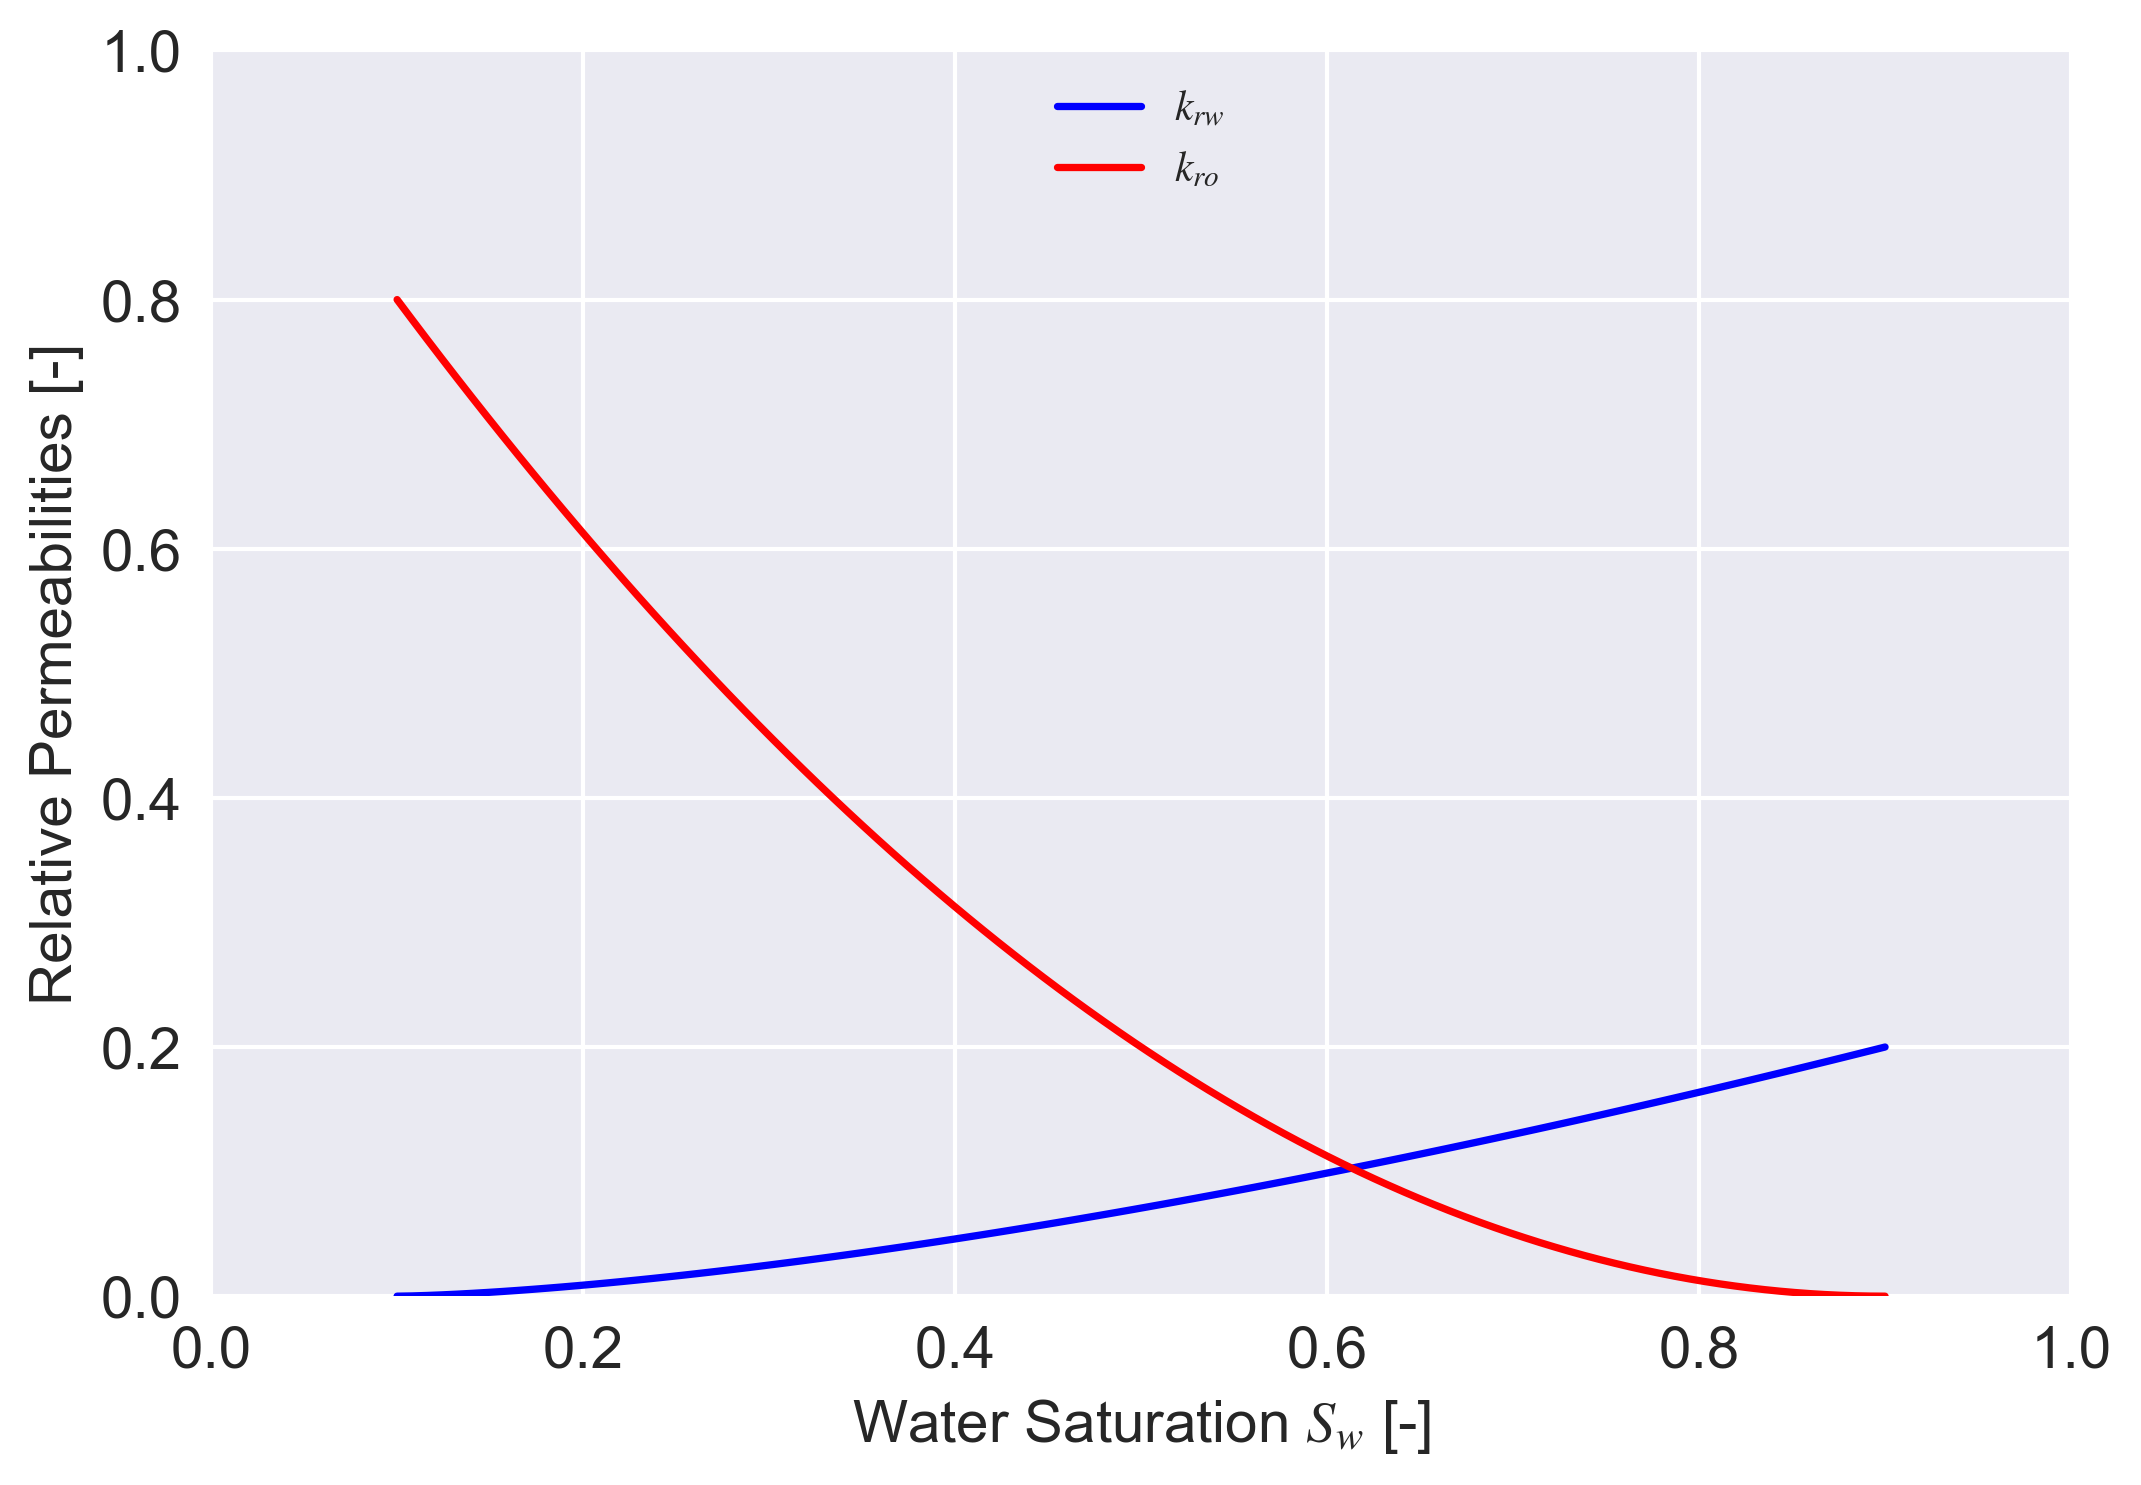

In [170]:
# Define the saturation values in the range stablished
# and compute rel perms and fractional flow (just for visualization).
# Reduce the saturation interval used based on eps to avoid division by zero
# while computing derivatives.
eps = 1.0e-5 
sw = np.linspace(sw_min+eps, sw_max-eps, 100)
kw = krw(aw, bw, sw_min, sw_max, sw)
ko = kro(ao, bo, sw_min, sw_max, sw)
fw  = fractional_flow(mu_w, mu_o, aw, bw, ao, bo, sw_min, sw_max, sw)
dfw_dsw = fractional_flow_derivative(mu_w, mu_o, aw, bw, ao, bo, sw_min, sw_max, sw)
fig1 = plt.figure()
plt.plot(sw, kw, '-b', label=r'$k_{rw}$')
plt.plot(sw, ko, '-r', label=r'$k_{ro}$')
# plt.vlines(sw_min , 0 , 1 , label='$S_{w,min}$' , colors='m' , linestyles='dashed') # Linha vertical para sw_min
# plt.vlines(sw_max , 0 , 1 , label='$S_{w,max}$' , colors='c' , linestyles='dashed') # Linha vertical para sw_max
plt.xlabel(r'Water Saturation $S_w$ [-]')
plt.ylabel('Relative Permeabilities [-]')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc='upper center')

plt.savefig('rel_perm_plot_old.png')
plt.show()

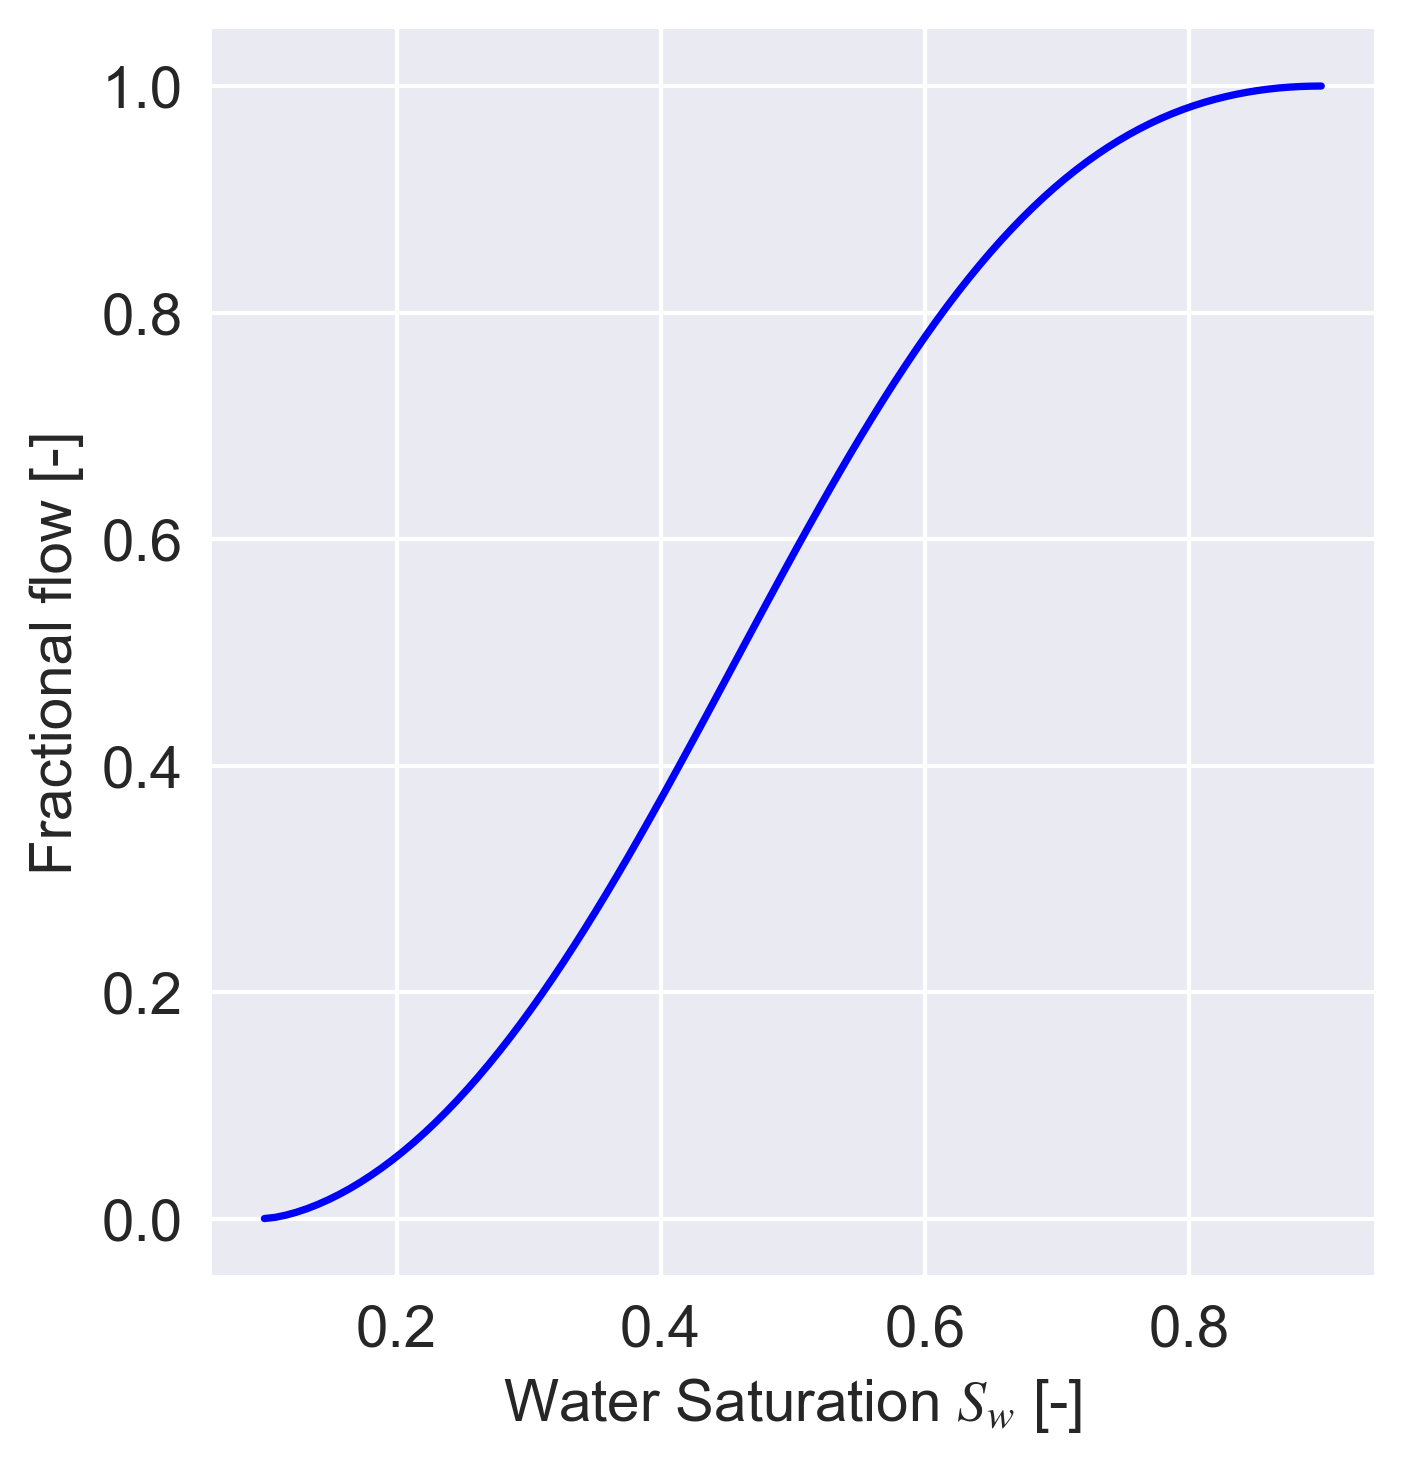

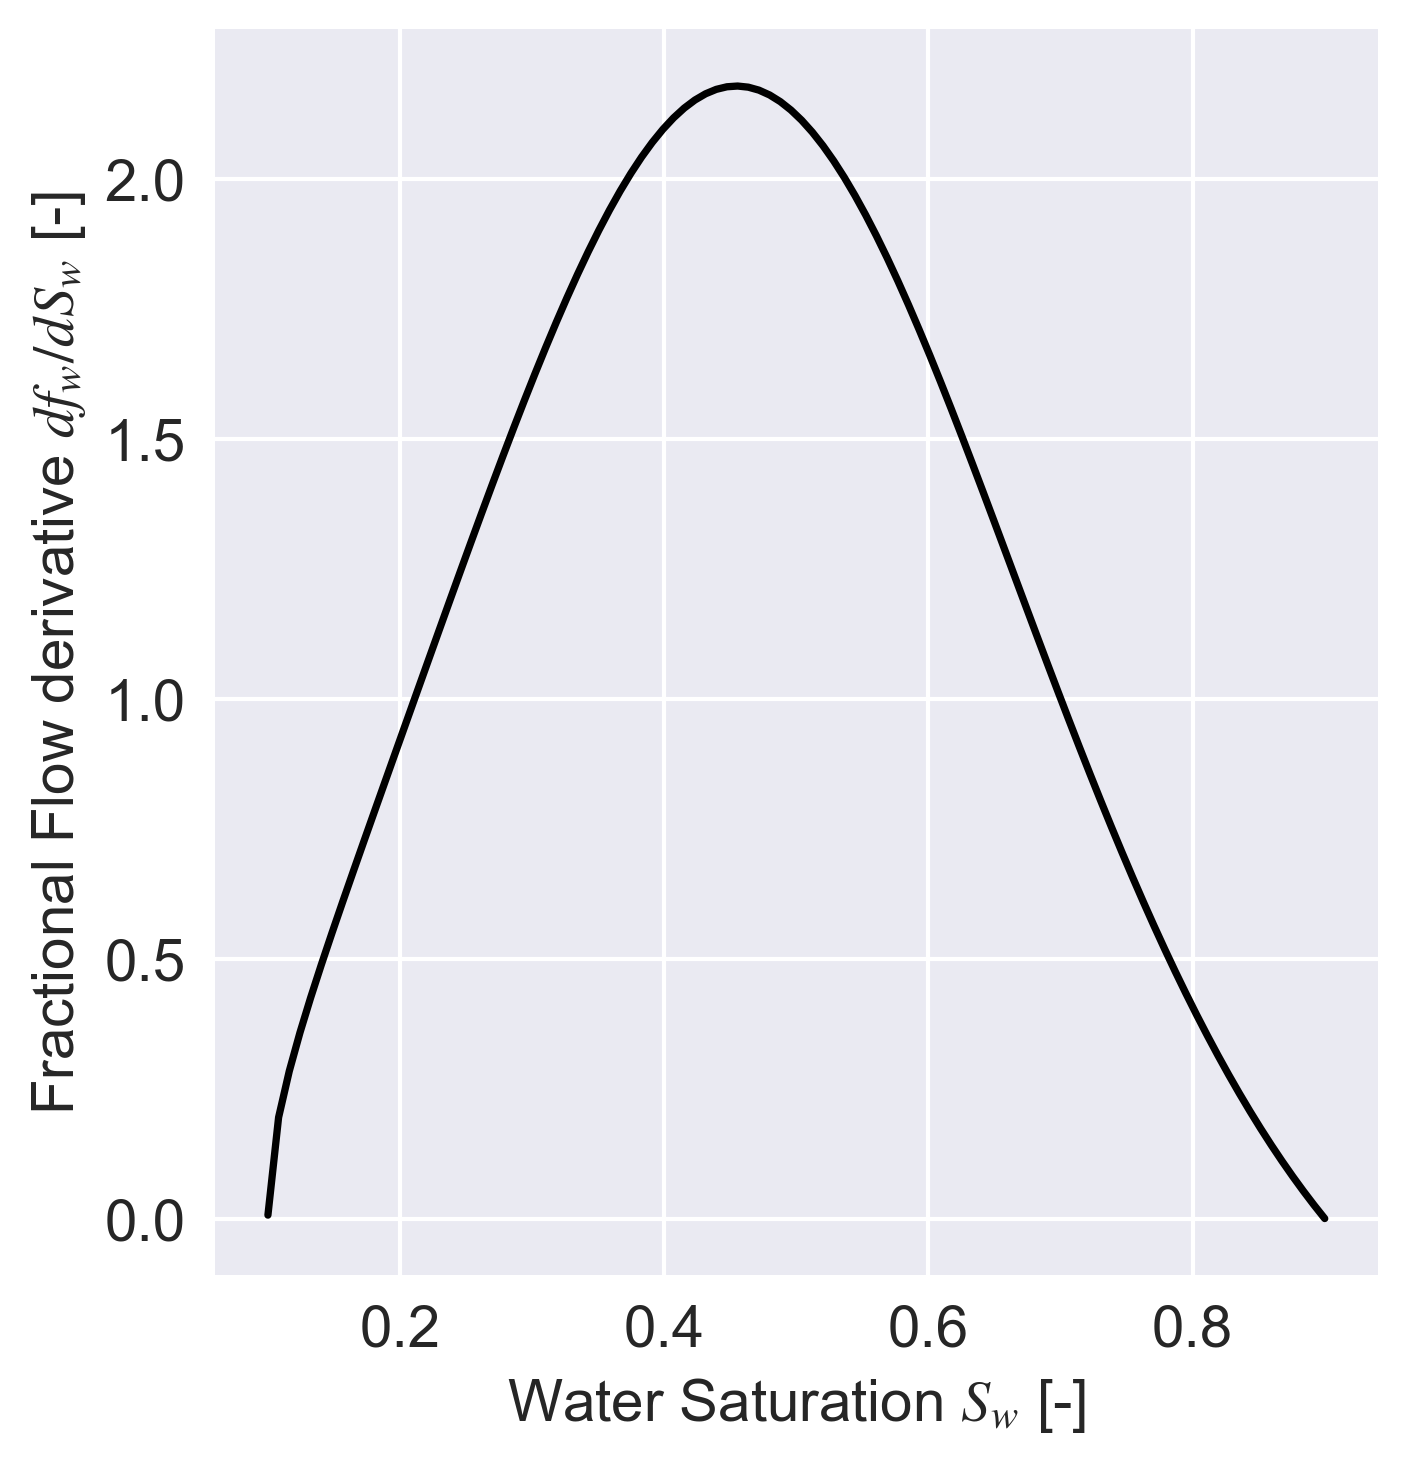

In [171]:
from matplotlib.gridspec import GridSpec
 
fig = plt.figure()
fig.set_figwidth(5)
#gs = fig.add_gridspec(1, 2)
 
# create sub plots as grid
#ax1 = fig.add_subplot(gs[0, 0])
#ax2 = fig.add_subplot(gs[0, 1])

plt.plot(sw, fw, '-b')
plt.xlabel(r'Water Saturation $S_w$ [-]')
plt.ylabel('Fractional flow [-]')
plt.savefig('fractional_flow.png')
plt.show

fig = plt.figure()
fig.set_figwidth(5)
plt.plot(sw, dfw_dsw, '-k')
plt.xlabel(r'Water Saturation $S_w$ [-]')
plt.ylabel('Fractional Flow derivative $df_w/dS_w$ [-]')
#fig.tight_layout(pad=3.0)
plt.savefig('fractional_flow_derivative.png')
plt.show()

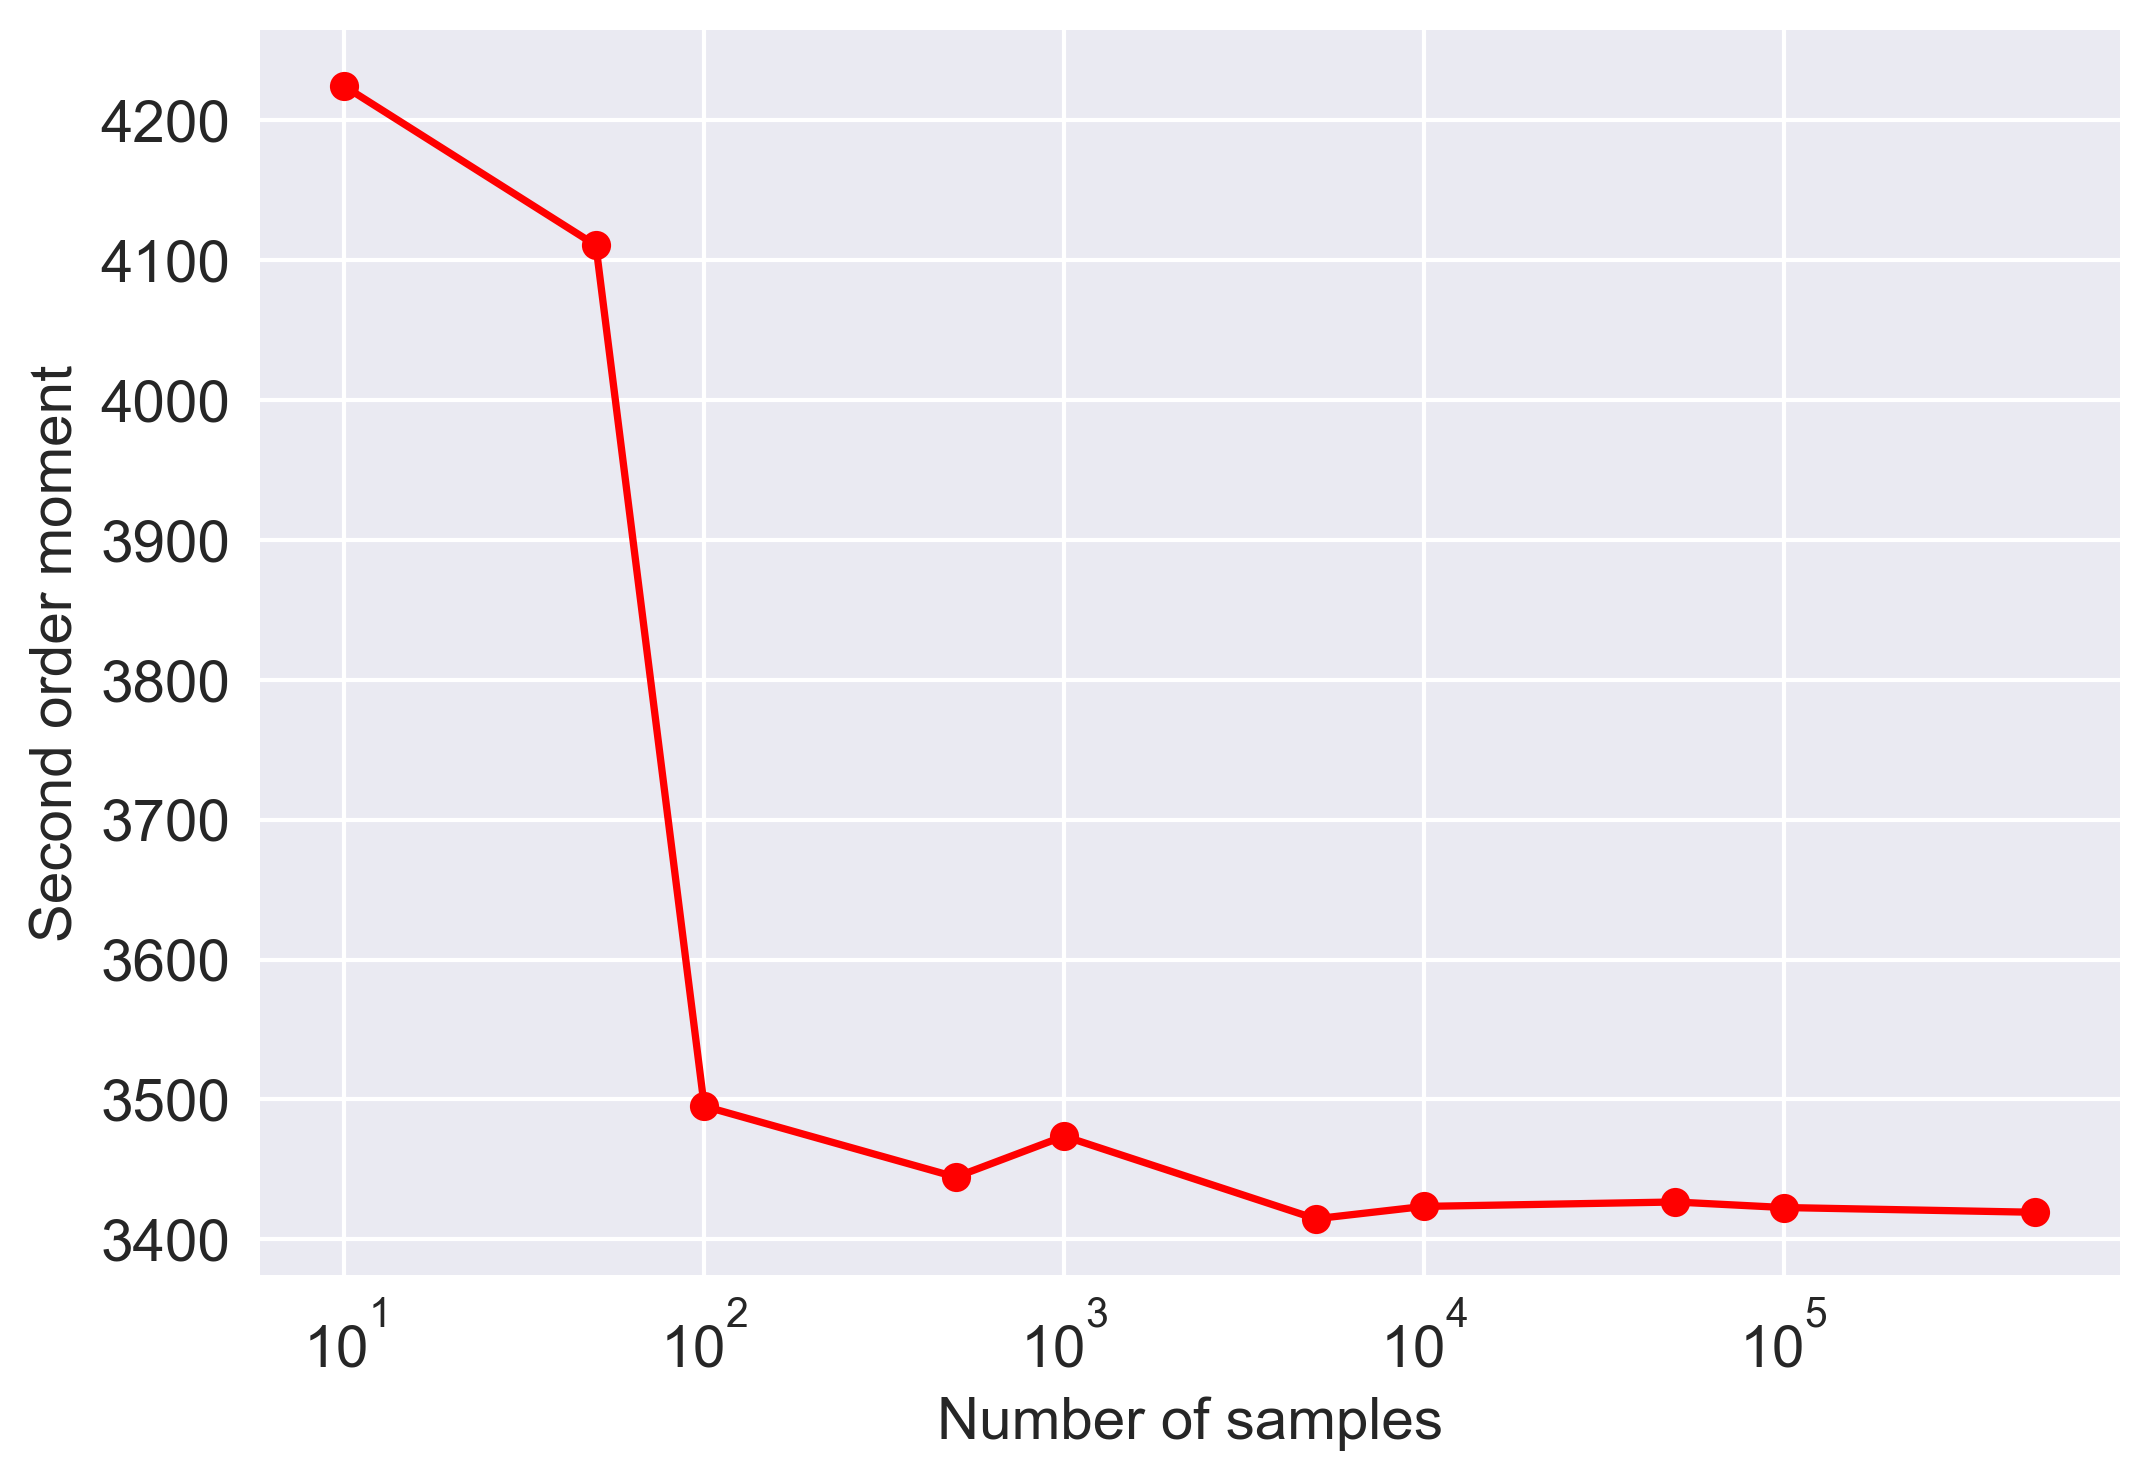

In [173]:
sample_number =  [10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0, 500000.0]
second_order_moment =  [4224.279346635761, 4110.55731325085, 3495.132026056282, 3444.494277040452, 3473.720997008265, 3414.6597936332446, 3423.5111413286854, 3426.6760964149903, 3422.71452448938, 3419.303471896859]

fig1 = plt.figure()
plt.plot(sample_number, second_order_moment, 'r-o')
plt.semilogx()
plt.xlabel(r'Number of samples')
plt.ylabel('Second order moment')
plt.savefig('mc-convergence.png')